In [1]:
#Load tha data set
import pandas as pd 
data = pd.read_csv(r'C:\Users\User\Desktop\ML Assessment\Dataset\Bank_Personal_Loan_Modelling.csv')

In [2]:
#################################################################### START EDA ###############################################################################################

In [3]:
#Display the dataset
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
#Shape of the dataset
print("the shape of the datase: ", data.shape)

the shape of the datase:  (5000, 14)


In [5]:
#Describe method shows details for the dataset

'''
Important: In education column we have that mean = 1.881000 where i close to 2 ,
2->Graduate, Thus most of the mebers are graduated
'''
data.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [6]:
#Type of each column 
#NOTE: Education is categorical 
print("The type of each column: \n",data.dtypes)

The type of each column: 
 ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [7]:
#Unique values
print("The amount of unique values per feature:\n",data.nunique())

The amount of unique values per feature:
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64



*********************************** Identify Missing Values ***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: floa

<AxesSubplot:>

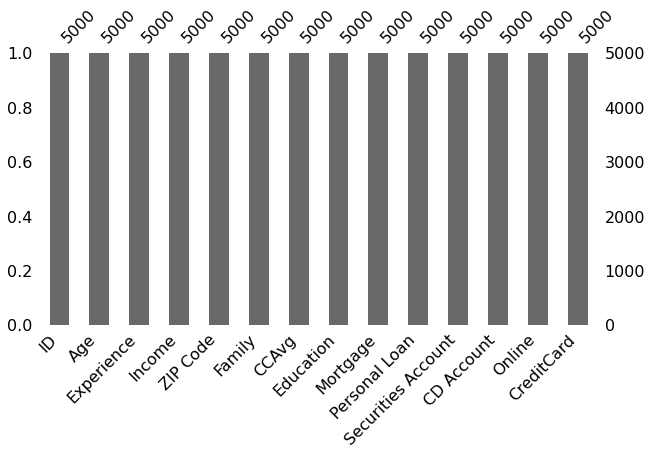

In [8]:
#Check for Missing values
print('\n'+('*'*35)+' Identify Missing Values '+('*'*35))
data.info()

#Check for missing values 
#Identify the missing data per caolumn and the missing data for all the dataset
print("Missing data per column:\n", data.isnull().sum())
print('\n'+('*'*100))
print("Missing data for the dataset: " ,data.isnull().sum().sum())

print('\n'+('*'*35)+' Plot Missing Values '+('*'*35))
#Grafical represenation that the dataset has no missing values
import missingno
missingno.bar(data,figsize=(10,5))

In [9]:
'''
Note from the above graphs: 
If we use "personal Loan", "Securities Account" , "CD Account"for target then we have an implance dataset
'''
#Data Pre-processing for the general dataset, when we solve each problem, we drop more columns for data pre-processing
data.drop(['ZIP Code','ID'],axis=1,inplace=True)

#In Expirience column we have negative values (-2, -3), thus its not possible because no ine can have negative expirience 
data.Experience[data.Experience < 0] = 0
print('\n'+('*'*35)+' New dataset '+('*'*35))
print(data.head())
print('\n'+('*'*35)+' New dataset description '+('*'*35))
print(data.describe())


*********************************** New dataset ***********************************
   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  

*********************************** New dataset description *******************************

<ipython-input-9-20a11dd07c34>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Experience[data.Experience < 0] = 0


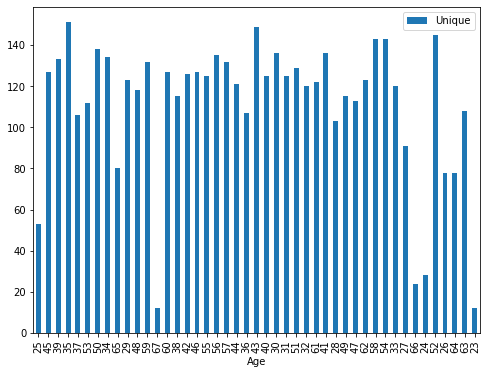

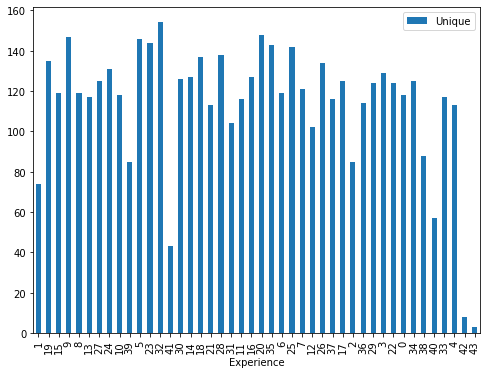

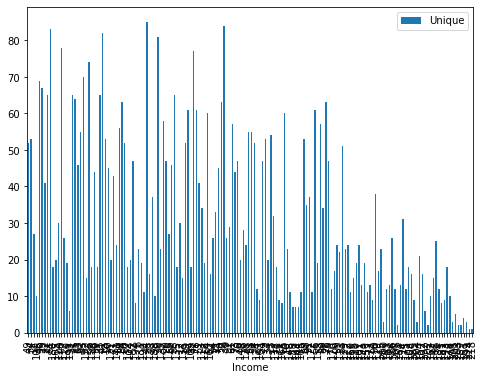

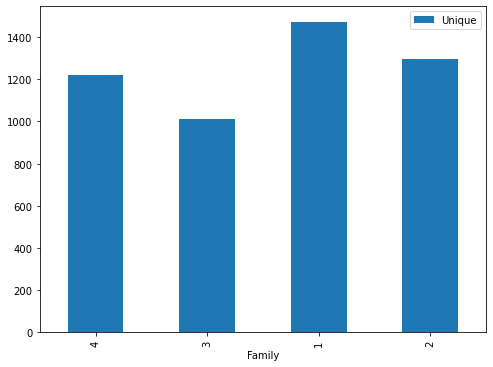

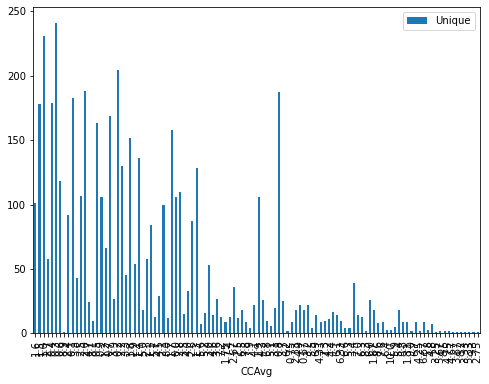

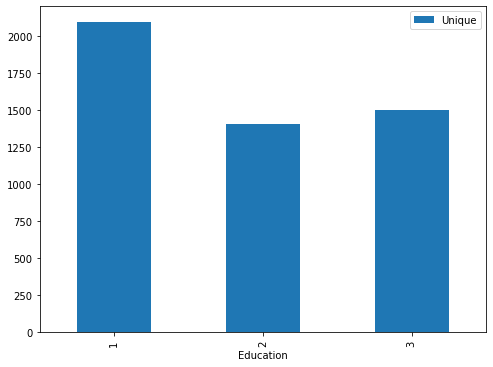

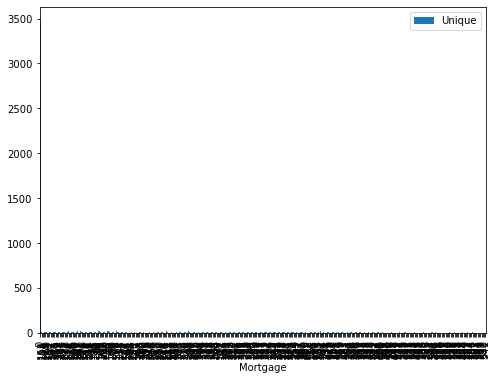

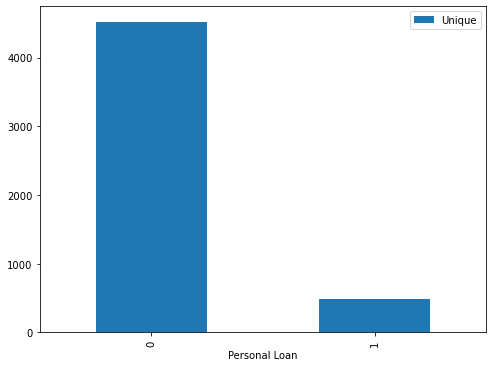

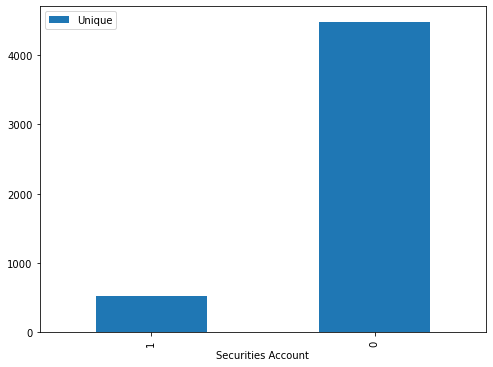

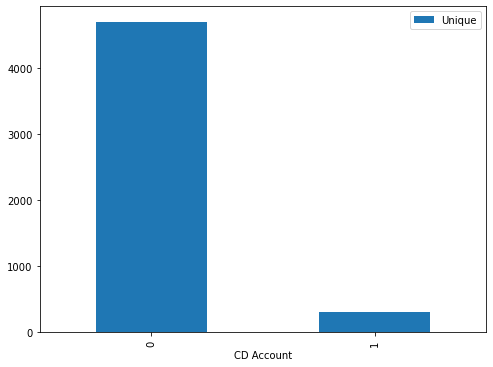

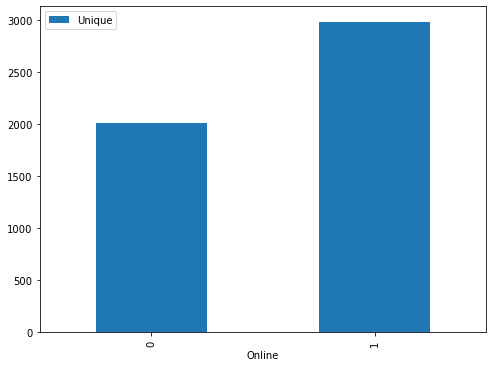

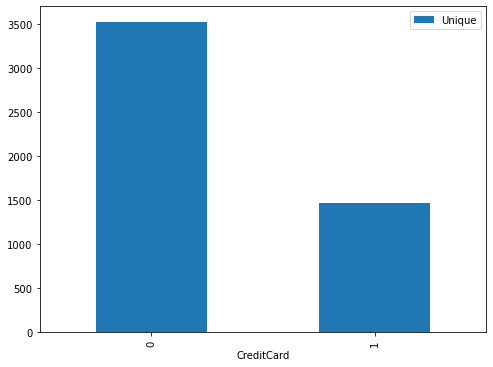

In [10]:
#Show the counts 
from collections import Counter
import seaborn as sns # display the unique values 
import matplotlib.pyplot as plt # display the unique values 
columns = data.columns

for col in columns:
    dictionary = dict(Counter(data[str(col)]))

    data_items = dictionary.items()
    data_list = list(data_items)

    df = pd.DataFrame(data_list)
    df.columns =[str(col),'Unique']

    df.plot(x =str(col), y='Unique', kind = 'bar', figsize=(8,6))  
    plt.show()

In [11]:
'''
EDA: 
Steps for EDA(Exploratory Data Analysis):
1)Understand the dataset ->DONE
2)Clean the dataset ->DONE
3)Analyse the relationship between the data -> Below
'''

'\nEDA: \nSteps for EDA(Exploratory Data Analysis):\n1)Understand the dataset ->DONE\n2)Clean the dataset ->DONE\n3)Analyse the relationship between the data -> Below\n'

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

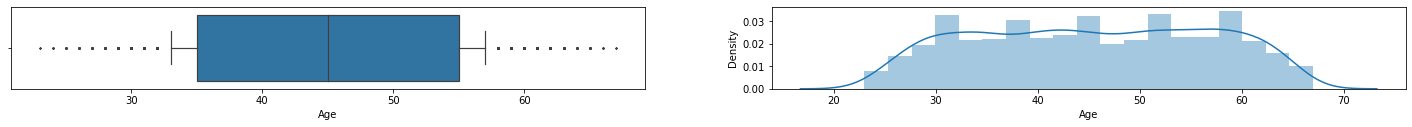

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


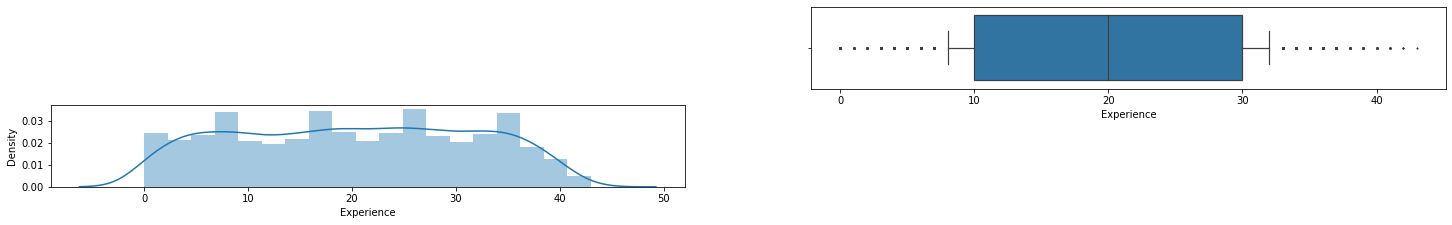

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


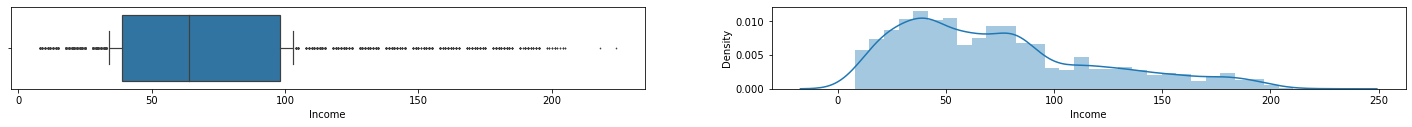

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


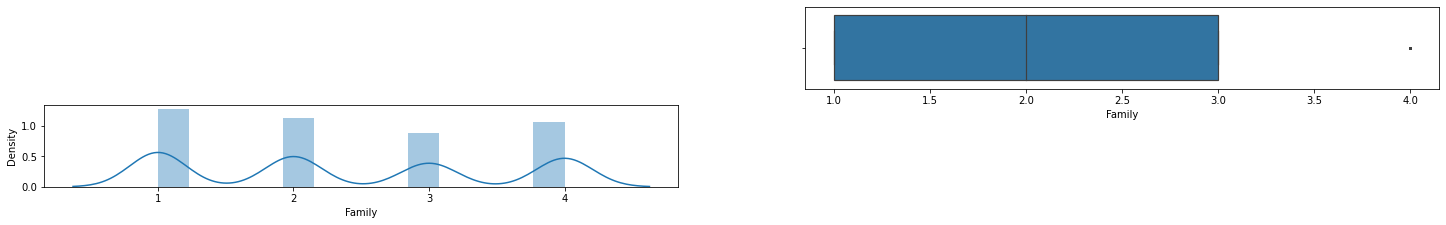

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


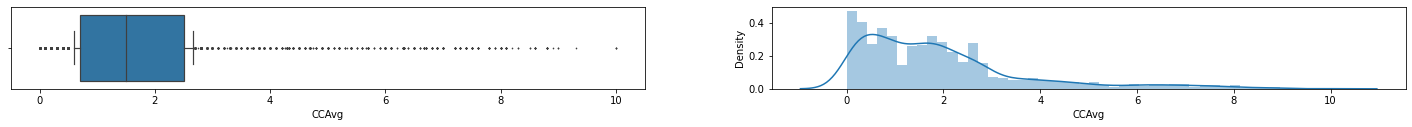

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


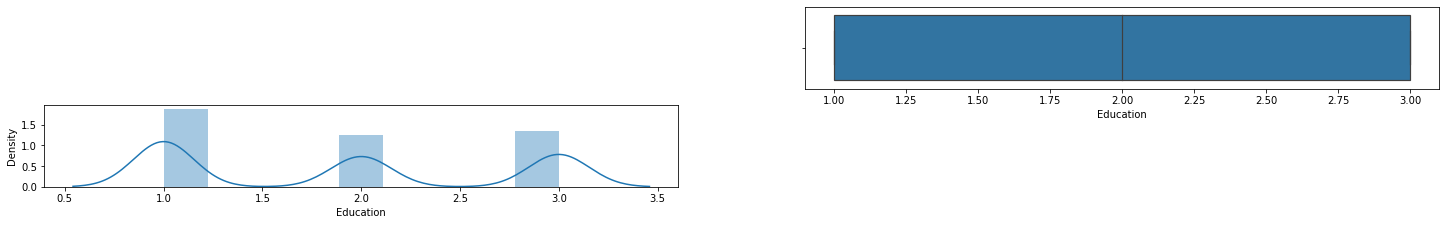

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


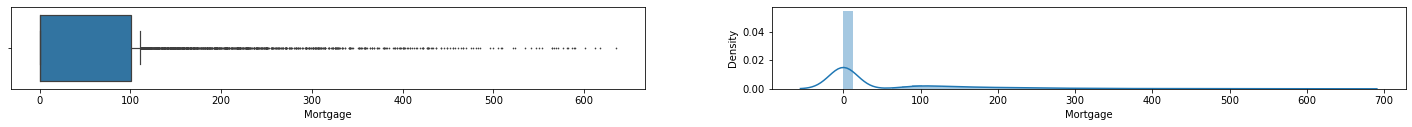

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


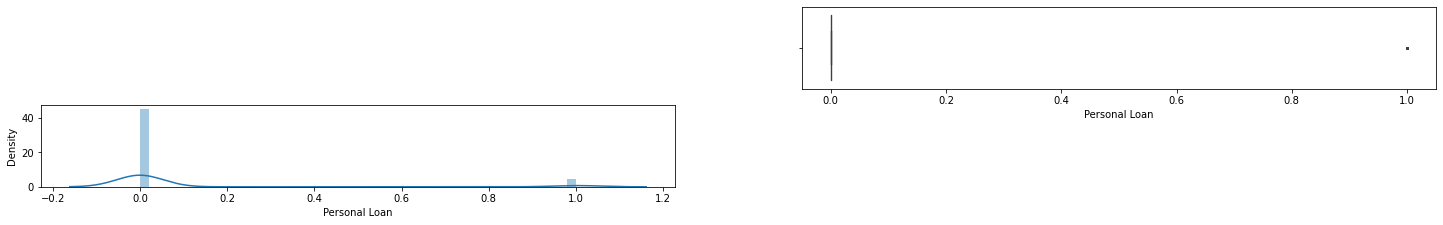

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


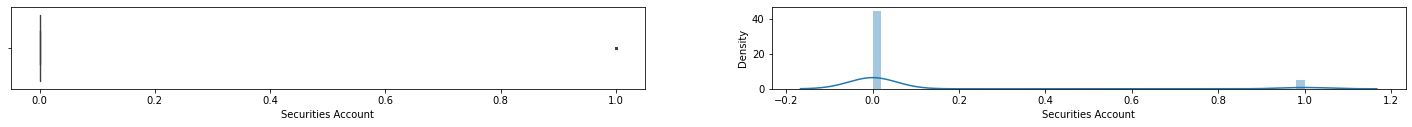

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


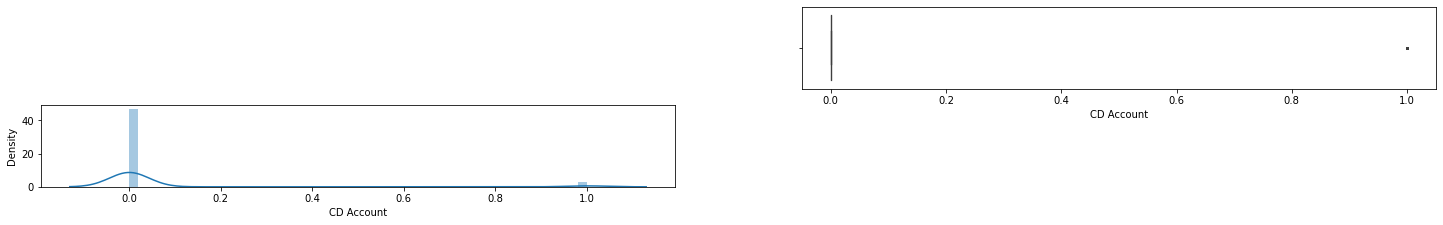

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


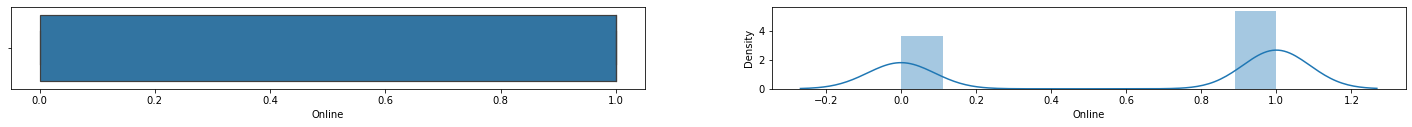

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


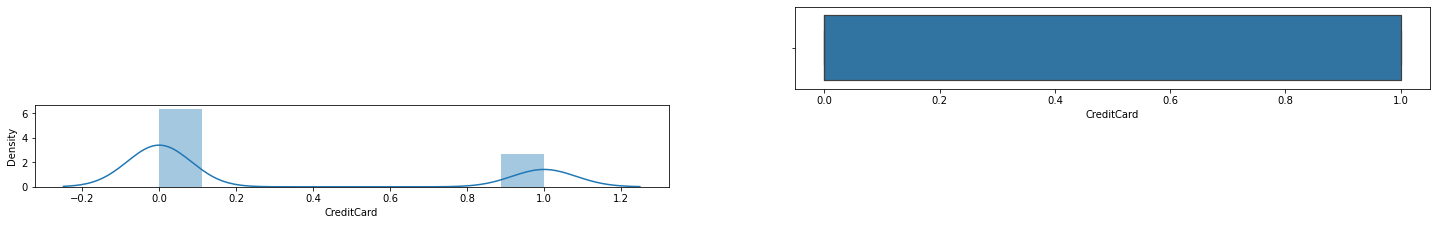

In [12]:
#Check for Outliers and show the distribution before IQR method
features = data.columns
plt.figure(figsize=(20,20))

for i,feature  in enumerate(features):
    plt.figure(figsize=(25,25))
    plt.subplot(14,2,i+1)
    sns.boxplot(x=data[str(feature)], width= 0.8, linewidth = 1.2, whis =0.1, fliersize= 0.8)
    plt.subplot(14,2,i+2)
    sns.distplot(data[str(feature)])
    plt.show()

In [13]:
#Dedect the outliers with IQR method
'''
IQR method:

The inter quartile method finds the outliers on NUMERICAL datasets by following the procedure below:
1)Find the first quartile, Q1.
2)Find the third quartile, Q3.
3)Calculate the IQR. IQR= Q3-Q1.
4)Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
5)Any data point outside this range is considered as outlier and should be removed for further analysis.

The concept of quartiles and IQR can best be visualized from the boxplot. 
It has the minimum and maximum point defined as Q1–1.5*IQR and Q3+1.5*IQR respectively.
Any point outside this range is outlier.
'''

'\nIQR method:\n\nThe inter quartile method finds the outliers on NUMERICAL datasets by following the procedure below:\n1)Find the first quartile, Q1.\n2)Find the third quartile, Q3.\n3)Calculate the IQR. IQR= Q3-Q1.\n4)Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.\n5)Any data point outside this range is considered as outlier and should be removed for further analysis.\n\nThe concept of quartiles and IQR can best be visualized from the boxplot. \nIt has the minimum and maximum point defined as Q1–1.5*IQR and Q3+1.5*IQR respectively.\nAny point outside this range is outlier.\n'

In [14]:
#Copy the original dataset to find the outliers for the numeric columns
dt = data.copy()
dt.drop([ 'Family', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] ,axis=1,inplace=True) #drop the numeric columns
#For each numeric column apply IQR method 
out = [] 
for i in dt.columns:
    Q1 = dt[i].quantile(0.25)
    Q3 = dt[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dt[(dt[i] < (Q1 - 1.5 * IQR)) | (dt[i] > (Q3 + 1.5 * IQR))].index  # find the index of the outliers
    out.extend(outliers)

data.drop(out, axis=0,inplace=True ) # drop the outliers from the original data
print('\n'+('*'*45)+' The dataset after IQR Method '+('*'*35))
print(data)
print('\n'+('*'*35)+' The dataset Describe Method after IQR Method '+('*'*35))
data.describe()


********************************************* The dataset after IQR Method ***********************************
      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online

Age   Experience       Income       Family        CCAvg  \
count  4398.000000  4398.000000  4398.000000  4398.000000  4398.000000   
mean     45.536608    20.294679    64.084584     2.439063     1.551146   
std      11.490289    11.483087    38.024646     1.160055     1.157534   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    35.000000     1.000000     0.600000   
50%      46.000000    20.000000    58.000000     2.000000     1.400000   
75%      56.000000    30.000000    83.000000     4.000000     2.200000   
max      67.000000    43.000000   185.000000     4.000000     5.200000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  4398.000000  4398.000000    4398.000000         4398.000000   
mean      1.922920    38.490678       0.062074            0.104366   
std       0.835704    68.108115       0.241317            0.305769   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000    83.000000       0.000000            0.000000   
max       3.000000   252.000000       1.000000            1.000000   

        CD Account       Online   CreditCard  
count  4398.000000  4398.000000  4398.000000  
mean      0.047067     0.593906     0.295589  
std       0.211806     0.491158     0.456359  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


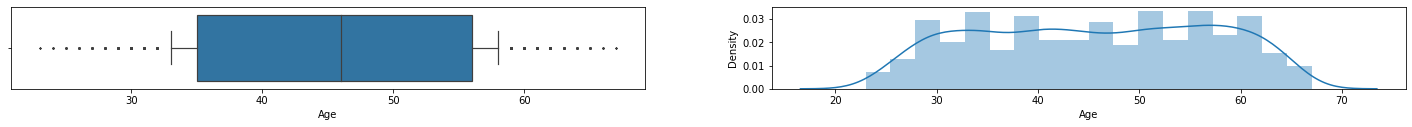

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


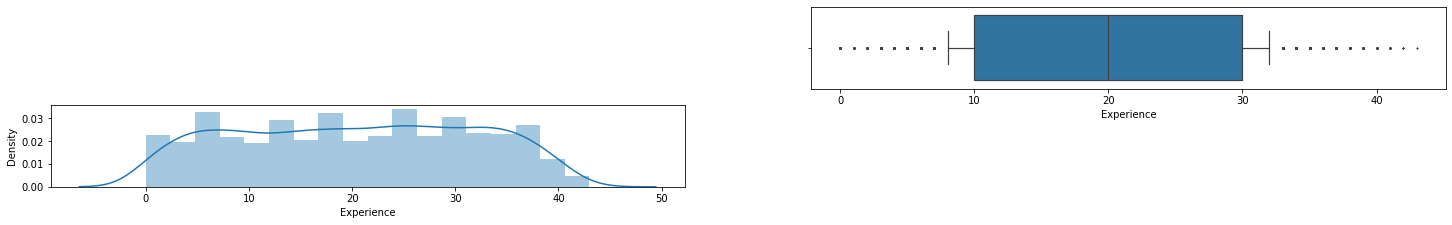

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


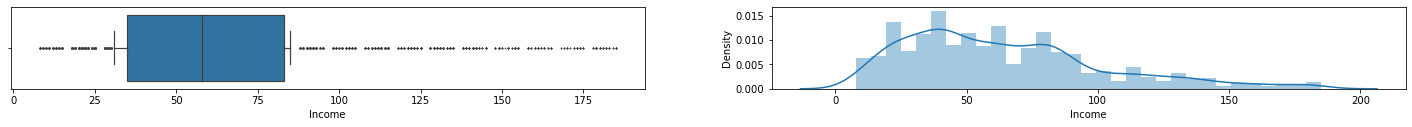

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


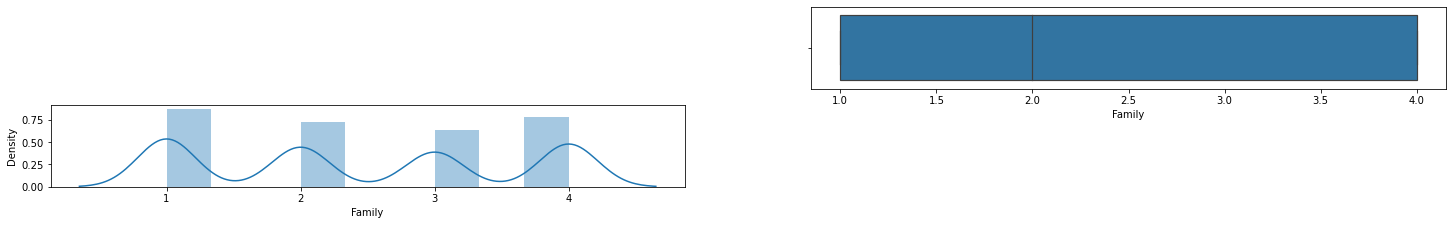

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


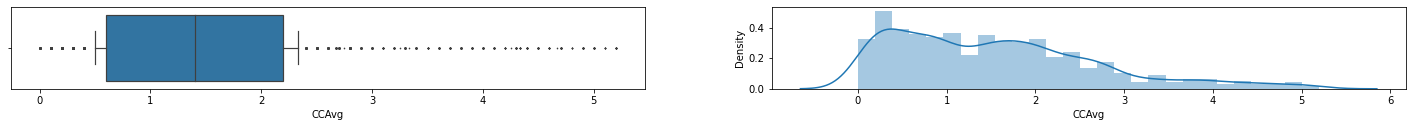

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


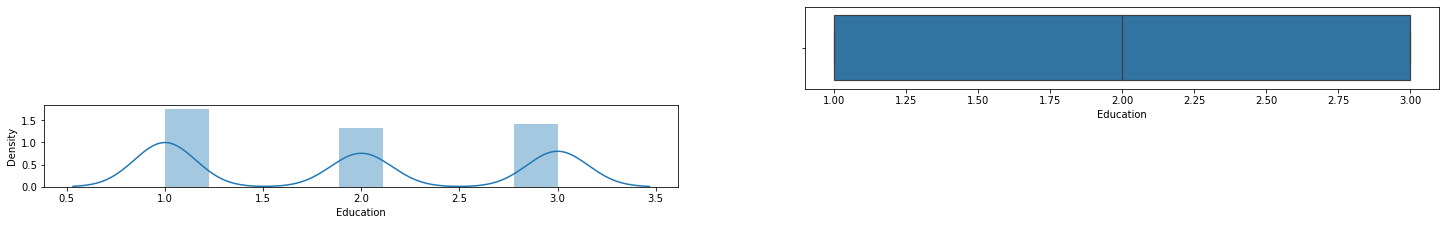

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


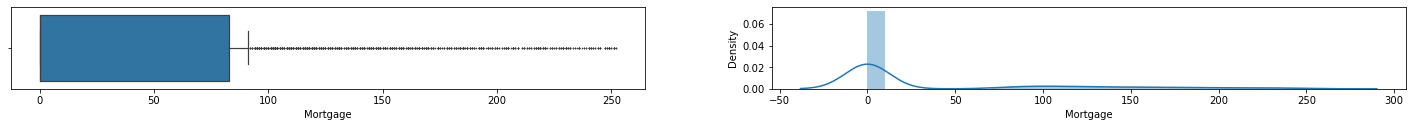

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


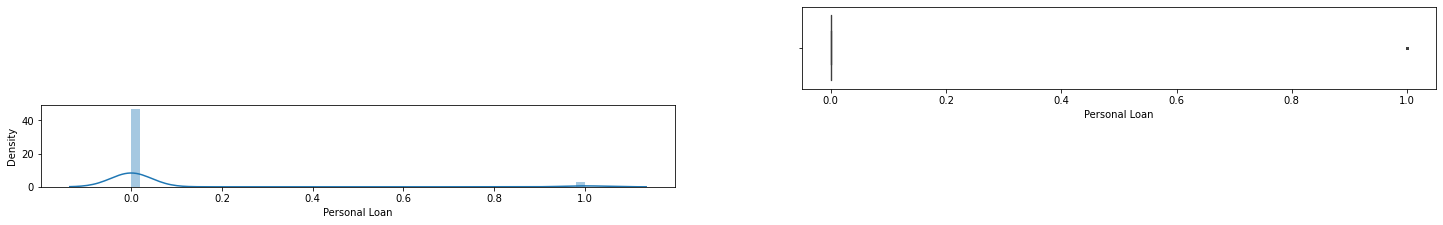

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


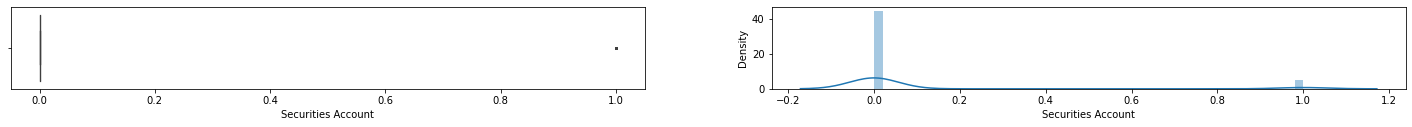

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


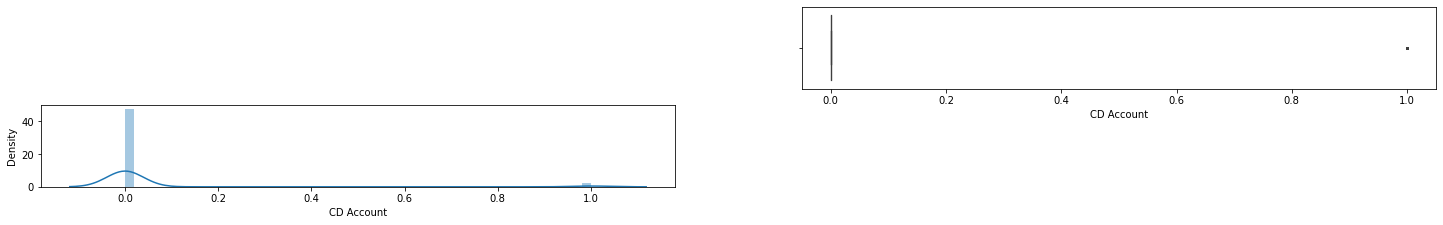

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


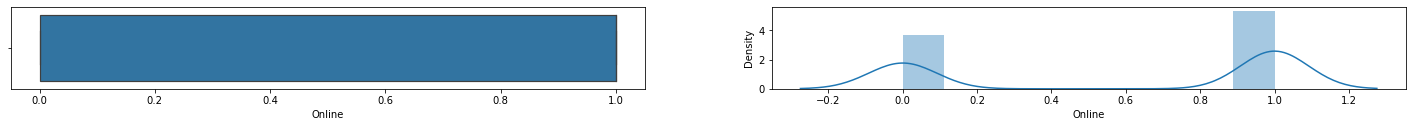

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


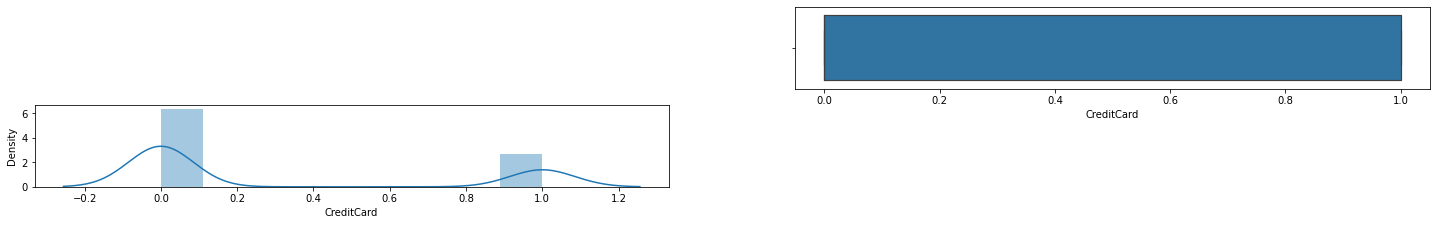

In [15]:
#Plot again the destripution and box plot after IQR Method 
new_features = data.columns
for i,feature  in enumerate(new_features):
    plt.figure(figsize=(25,25))
    plt.subplot(14,2,i+1)
    sns.boxplot(x=data[str(feature)], width= 0.8, linewidth = 1.2, whis =0.1, fliersize= 0.8)
    plt.subplot(14,2,i+2)
    sns.distplot(data[str(feature)])
    plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


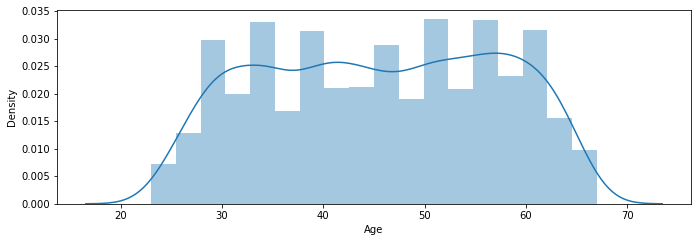

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


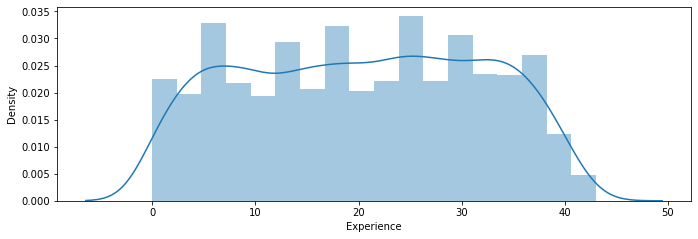

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


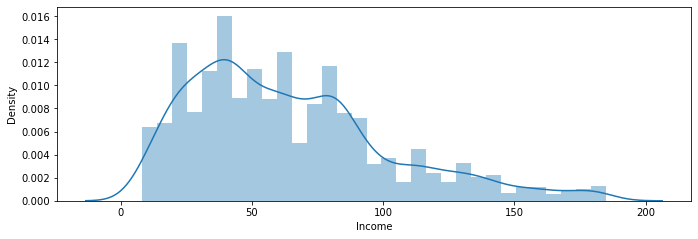

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


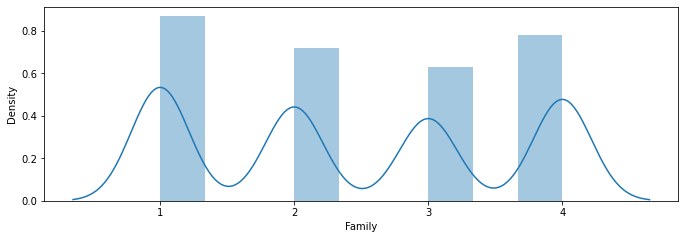

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


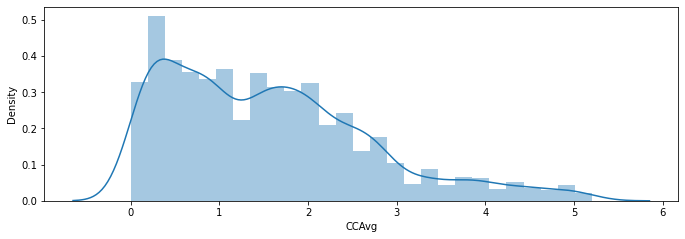

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


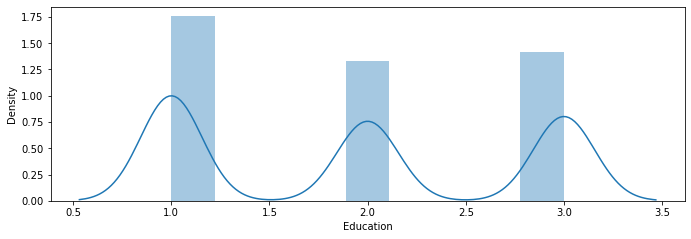

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


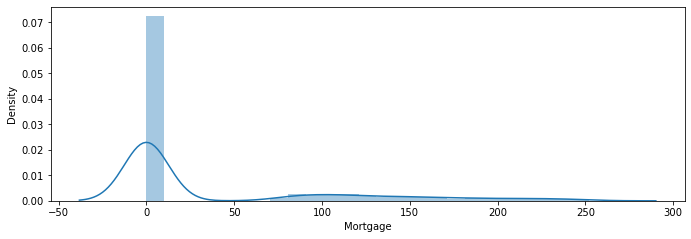

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


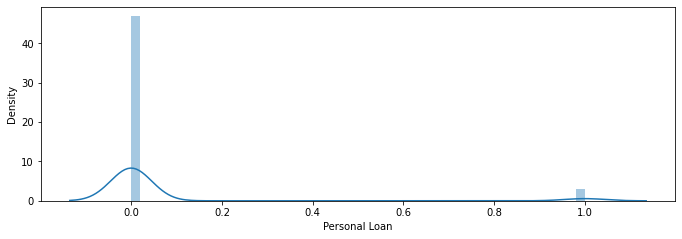

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


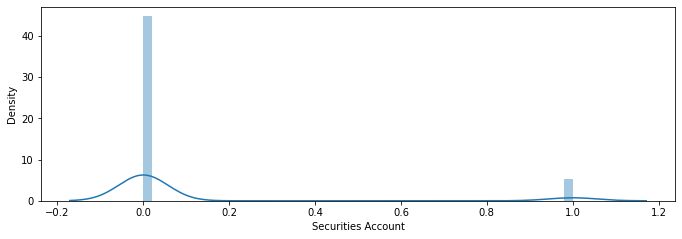

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


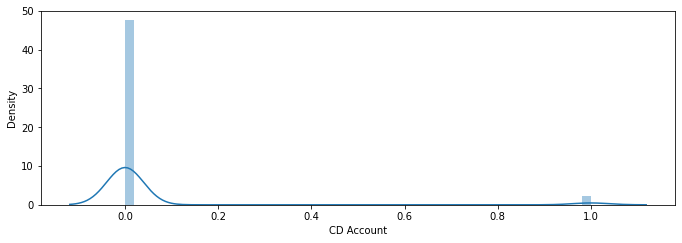

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


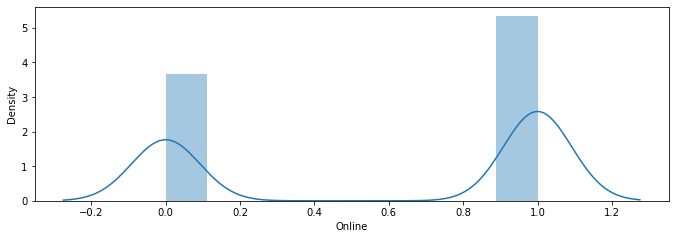

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


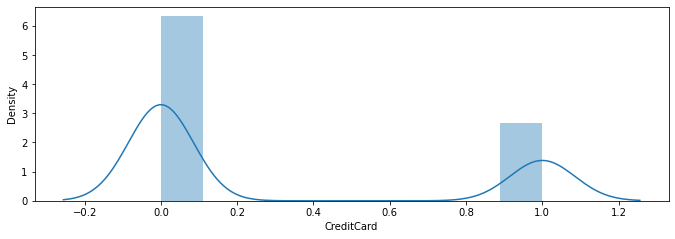

In [16]:
#Plot the Destripution of every Feature
columns = data.columns
for i,feature  in enumerate(columns):
    plt.figure(figsize=(25,25))
    plt.subplot(6,2,i+1)
    sns.distplot(data[str(feature)])
    plt.show()

In [17]:
'''
Hypothesis Testing at 5% significant level:
normalize ->check if the samples follows the Normal (0,1) Distribution with QQ-plots/Histogram and  K-S test
H0 -> the sample ~ N(0,1)
H1 -> the sample does not  ~ N(0,1)'''

import numpy as np
import statsmodels.api as sm
import pylab as py
from scipy import stats

def Hypothesis_test (test):
  attribute_data = data.copy()
  attribute = attribute_data[str(test)]

  # Convert a pandas.Series to list
  print('\n'+('*'*35)+' Convert a pandas.Series to list '+ ('*'*35))
  print('The type of Income feature:',type(attribute))
  attribute_list = attribute.values
  print('The type of Income feature:',type(attribute_list))

  #Normalize the 'Income' attribute
  print('\n'+('*'*35)+' Normalize the attribute '+ ('*'*35))

  min_attribute = min(attribute_list) 
  max_attribute = max(attribute_list)
  for i, x in enumerate(attribute_list):
      attribute_list[i] = (x-min_attribute) / (max_attribute-min_attribute)
  print('The min %.3f and max  %.3f after normalization' %(min(attribute_list), max(attribute_list)))
  print('\n'+('*'*35)+'QQ Plot for '+('%s'%str(test))+ ('*'*35))
  #QQ plot  
  sm.qqplot(attribute_list, line ='45')
  py.show()

  #KS Test
  print('\n'+('*'*35)+'KS Test for '+('%s'%str(test))+ ('*'*35))
  print(stats.kstest(attribute_list, 'norm'))



*********************************** Convert a pandas.Series to list ***********************************
The type of Income feature: <class 'pandas.core.series.Series'>
The type of Income feature: <class 'numpy.ndarray'>

*********************************** Normalize the attribute ***********************************
The min 0.000 and max  1.000 after normalization

***********************************QQ Plot for Age***********************************


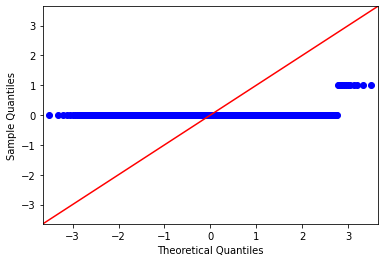


***********************************KS Test for Age***********************************
KstestResult(statistic=0.5, pvalue=0.0)

*********************************** Convert a pandas.Series to list ***********************************
The type of Income feature: <class 'pandas.core.series.Series'>
The type of Income feature: <class 'numpy.ndarray'>

*********************************** Normalize the attribute ***********************************
The min 0.000 and max  1.000 after normalization

***********************************QQ Plot for Experience***********************************


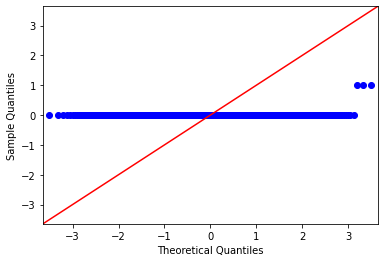


***********************************KS Test for Experience***********************************
KstestResult(statistic=0.5, pvalue=0.0)

*********************************** Convert a pandas.Series to list ***********************************
The type of Income feature: <class 'pandas.core.series.Series'>
The type of Income feature: <class 'numpy.ndarray'>

*********************************** Normalize the attribute ***********************************
The min 0.000 and max  1.000 after normalization

***********************************QQ Plot for Income***********************************


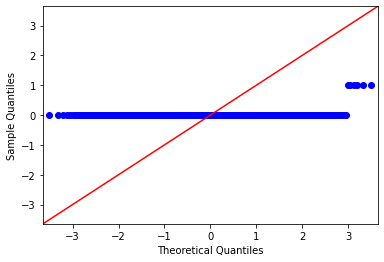


***********************************KS Test for Income***********************************
KstestResult(statistic=0.5, pvalue=0.0)

*********************************** Convert a pandas.Series to list ***********************************
The type of Income feature: <class 'pandas.core.series.Series'>
The type of Income feature: <class 'numpy.ndarray'>

*********************************** Normalize the attribute ***********************************
The min 0.000 and max  1.000 after normalization

***********************************QQ Plot for CCAvg***********************************


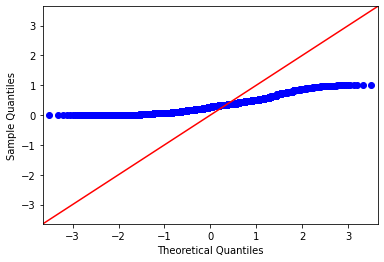


***********************************KS Test for CCAvg***********************************
KstestResult(statistic=0.5, pvalue=0.0)

*********************************** Convert a pandas.Series to list ***********************************
The type of Income feature: <class 'pandas.core.series.Series'>
The type of Income feature: <class 'numpy.ndarray'>

*********************************** Normalize the attribute ***********************************
The min 0.000 and max  1.000 after normalization

***********************************QQ Plot for Mortgage***********************************


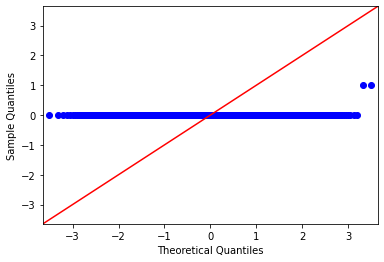


***********************************KS Test for Mortgage***********************************
KstestResult(statistic=0.5, pvalue=0.0)


In [18]:
#test the numeric Features of the dataset
test_features = ['Age', 'Experience','Income', 'CCAvg', 'Mortgage']
for name in test_features:
  Hypothesis_test(name)


*********************************** The correlation coefficient between the Features ***********************************
                         Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994100 -0.035804 -0.058885 -0.023779   
Experience          0.994100    1.000000 -0.028161 -0.063563 -0.026460   
Income             -0.035804   -0.028161  1.000000 -0.138421  0.518550   
Family             -0.058885   -0.063563 -0.138421  1.000000 -0.057177   
CCAvg              -0.023779   -0.026460  0.518550 -0.057177  1.000000   
Education           0.034672    0.007249 -0.149095  0.024361 -0.070689   
Mortgage           -0.007577   -0.007002 -0.056477  0.026872 -0.018175   
Personal Loan      -0.015132   -0.012266  0.466305  0.012296  0.328350   
Securities Account  0.005677    0.004258  0.001725  0.022742  0.020410   
CD Account          0.005973    0.008229  0.114803 -0.000820  0.082784   
Online              0.018553    0.018279  0.004190  0.014835 -0.

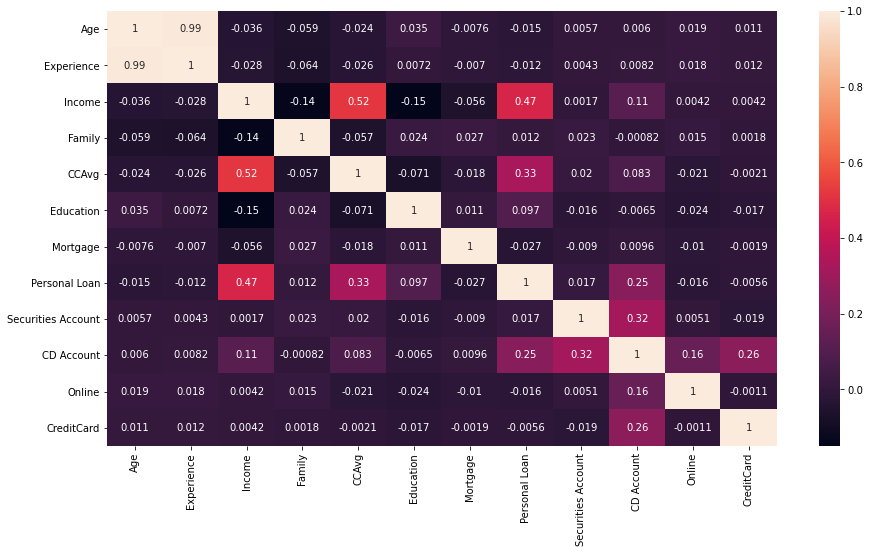

In [19]:
#Copy the new data with out the outliers 
data_new = data.copy()

#Plot the correlatiom Matrix
correlations = data_new.corr()
print('\n'+('*'*35) +' The correlation coefficient between the Features '+ ('*'*35))
print(correlations)

plt.figure(figsize = (15,8))
sns.heatmap(correlations, annot = True, xticklabels=correlations.columns.values, yticklabels=correlations.columns.values)

print('\n'+('*'*35) +' The correlation Matrix '+ ('*'*35))           
plt.show()

In [20]:
#########################################################################  FINISH EDA  ########################################################################################

In [21]:
#######################################################################  First Senario  #######################################################################################

In [22]:
'''
1st Senario
Fase 1
Identify when a custimer will take the loan or not, based in the column, 'Personal Loan' 
Build a simple decsion tree model , find the recall etc 

Identify the best parameters using Gridsearch, and cost complexity prunning , with 10 fold cross validation
find the recall etc 
Apply sMote method to check the possible results 
find the recall etc 
'''
#copy the dataset
decision_tree = data.copy()
decision_tree

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4398 rows x 12 columns]


********************************************* EDA for the first Senario ***********************************


*********************************** Target Coloumn Counter***********************************
Original dataset shape Counter({0: 4125, 1: 273})

*********************************** Plot the Target Coloumn ***********************************


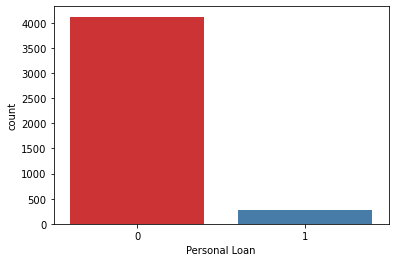


*********************************** Each Feature with Target Coloumn ***********************************


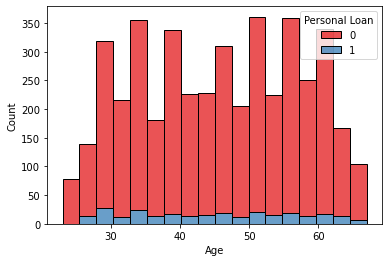

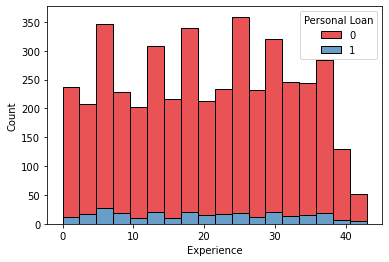

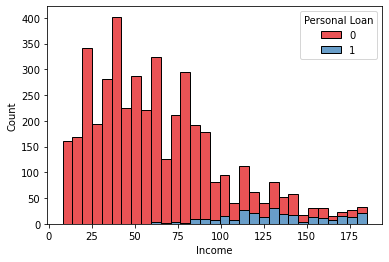

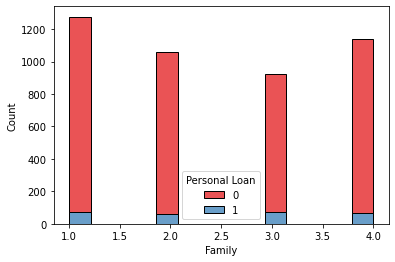

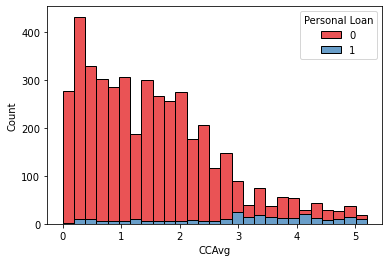

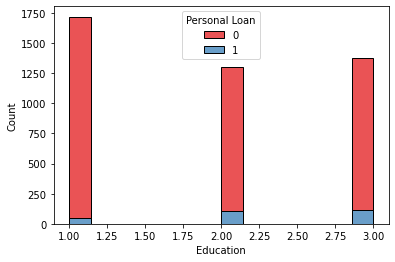

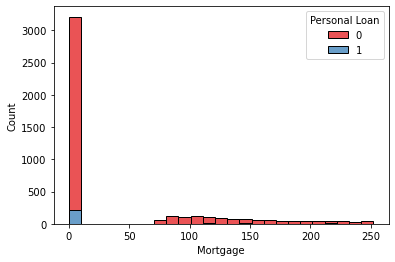

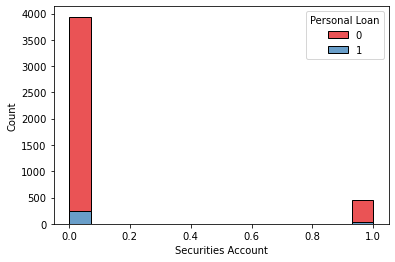

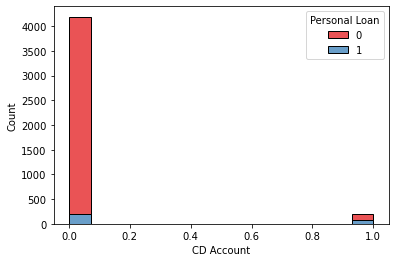

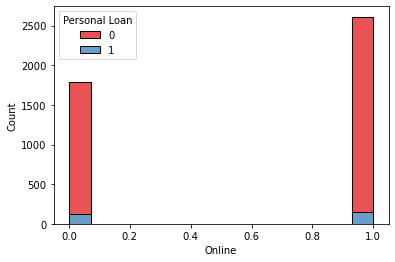

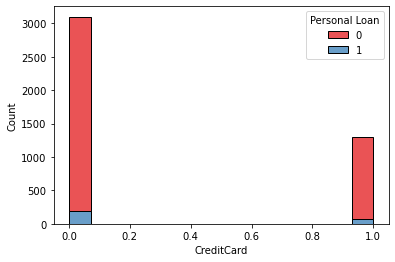

In [23]:
#Some EDA for the Decsion tree 
#NOTE: The target column is 'Persona Loan'
print('\n'+('*'*45)+' EDA for the first Senario '+('*'*35))
print()

print('\n'+('*'*35)+' Target Coloumn Counter'+('*'*35))
print('Original dataset shape %s' % Counter(decision_tree['Personal Loan']))

print('\n'+('*'*35)+' Plot the Target Coloumn '+('*'*35))
sns.countplot(x=decision_tree['Personal Loan'], palette = 'Set1')
plt.show()

print('\n'+('*'*35)+' Each Feature with Target Coloumn '+('*'*35))
#Plot each Feature based on target coloumn
feture_name = ['Age','Experience','Income','Family' ,'CCAvg','Education','Mortgage', 'Securities Account','CD Account', 'Online','CreditCard']
for plot in feture_name:
  sns.histplot(decision_tree, x=plot, hue='Personal Loan', multiple='stack', palette = 'Set1')
  plt.show()

In [24]:
Features = decision_tree[feture_name] # Features
Target = decision_tree['Personal Loan']# Target variable


*********************************** Simple Decision Tree*********************************************


*********************************** The Classifier*********************************************
DecisionTreeClassifier()

*********************************** DataFrame of Predicted Values *********************************************
      Actual  Predicted
977        0          0
2199       0          0
2665       0          0
2330       0          0
2010       0          0
...      ...        ...
4071       0          0
4826       0          0
430        0          1
3198       0          0
1649       0          0

[1320 rows x 2 columns]

*********************************** Accuracy **************************************************
Accuracy:  0.9840909090909091

*********************************** Confushion Matrix of Simple Decision Tree ***********************************
[[1234    6]
 [  15   65]]


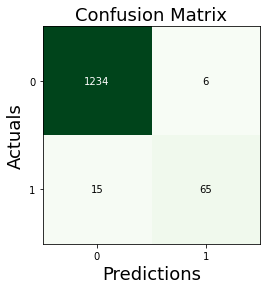


****************************** Recall, Precision and F1-scpre of Simple Decision Tree ******************************
Precision score: 0.9154929577464789
Recall score: 0.8125
F1 Score: 0.8609271523178808
Accuracy score: 0.9840909090909091

*********************************** Classification Report of Simple Decision Tree ***********************************
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      1240
     class 1       0.92      0.81      0.86        80

    accuracy                           0.98      1320
   macro avg       0.95      0.90      0.93      1320
weighted avg       0.98      0.98      0.98      1320



In [25]:
#Apply a simlpe Decsion tree (with out cross validation / Grid Search[optimal values]/ Smote method)
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('\n'+('*'*35)+' Simple Decision Tree'+('*'*45))
print()
#Build the Decsion tree
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.3, random_state=1) # 70% training and 30% test

print('\n'+('*'*35)+' The Classifier'+('*'*45))
tree = DecisionTreeClassifier().fit(Features_train,Target_train)
print(tree)

#Accuracy 
Target_pred = tree.predict(Features_test)
print('\n' + ('*'*35)+ ' DataFrame of Predicted Values '+('*'*45))
Predictions_DT=pd.DataFrame({'Actual':Target_test, 'Predicted':Target_pred})
print(Predictions_DT)
print('\n' + ('*'*35)+ ' Accuracy '+('*'*50))
print("Accuracy: ",metrics.accuracy_score(Target_test, Target_pred))

#confusion Matrix
print('\n' + ('*'*35)+ ' Confushion Matrix of Simple Decision Tree '+('*'*35))
cm = confusion_matrix(Target_test, tree.predict(Features_test))
print(cm)
#Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#Confermation that the values that we had in the report are True with out cross val method 
print('\n' + ('*'*30)+ ' Recall, Precision and F1-scpre of Simple Decision Tree '+('*'*30))
print("Precision score: {}".format(precision_score(Target_test, Target_pred)))
print("Recall score: {}".format(recall_score(Target_test, Target_pred)))
print("F1 Score: {}".format(f1_score(Target_test, Target_pred)))
print("Accuracy score: {}".format(accuracy_score(Target_test, Target_pred)))

#Report for the Decsion tree
print('\n' + ('*'*35)+ ' Classification Report of Simple Decision Tree '+('*'*35))
target_names = ['class 0', 'class 1']
print(classification_report(Target_test, Target_pred, target_names=target_names))

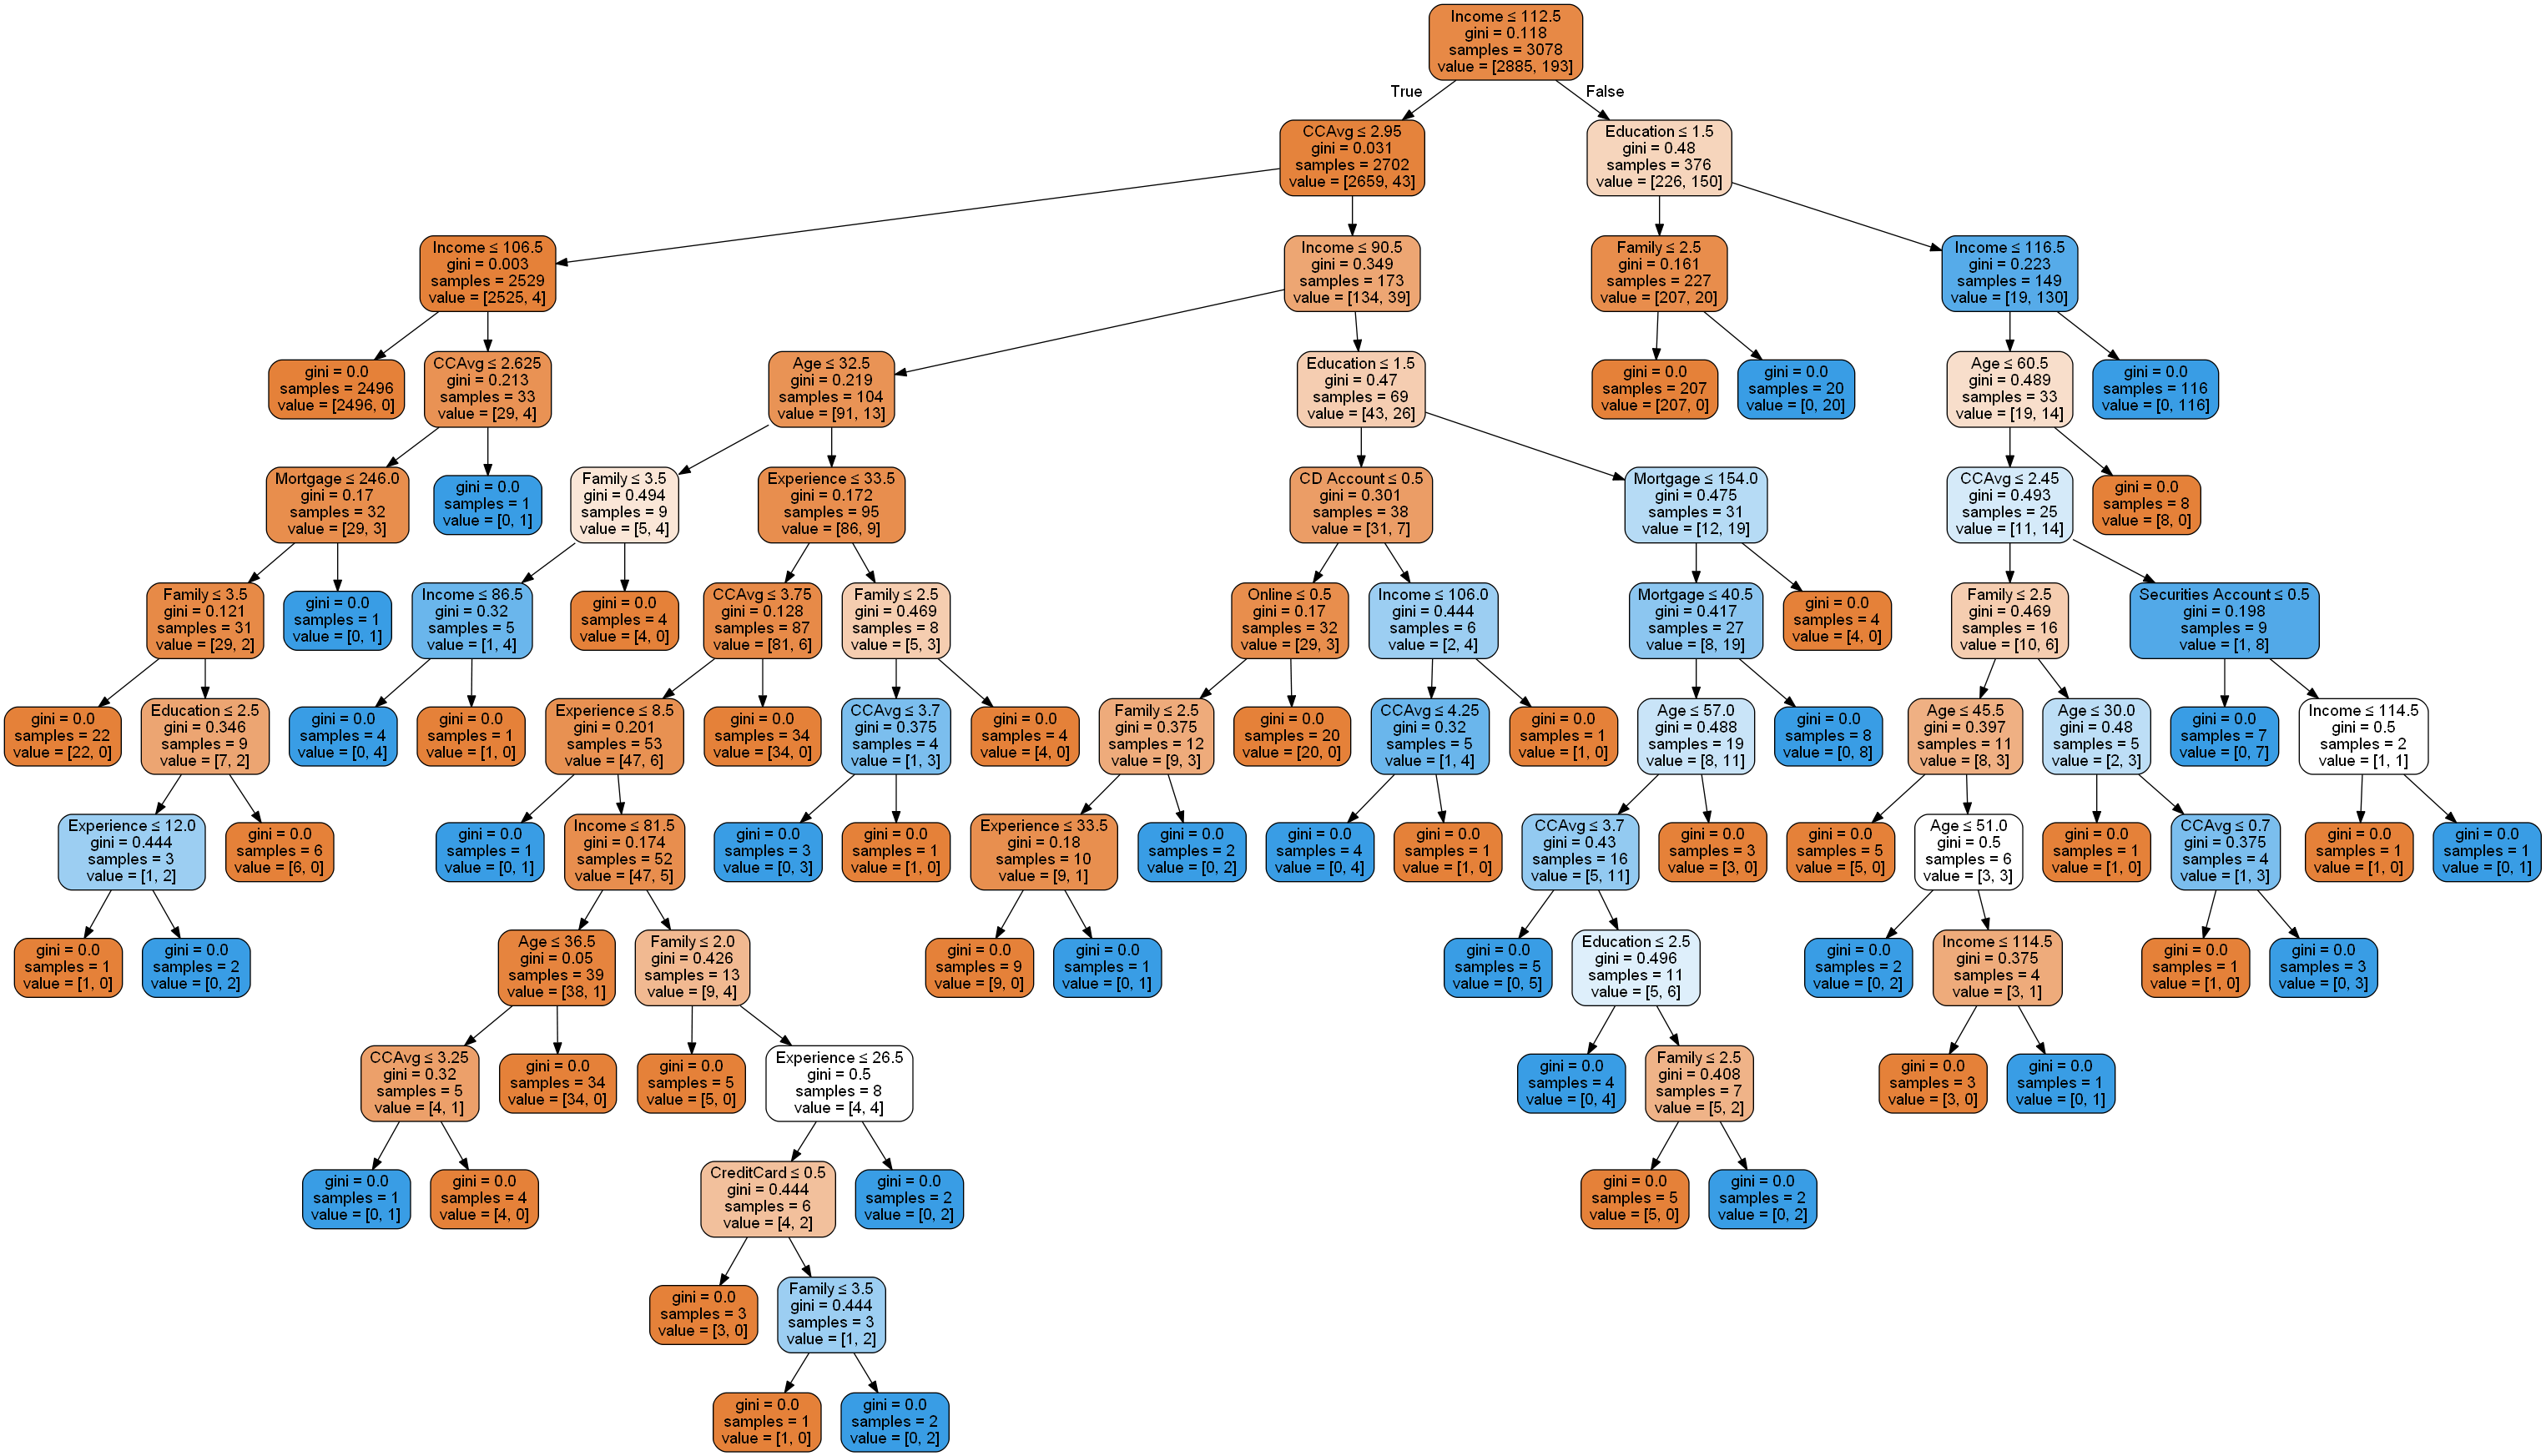

In [26]:
#Visualize the simple Decsion tree 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feture_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Loan_SimpleDecisionTree.png')
Image(graph.create_png())

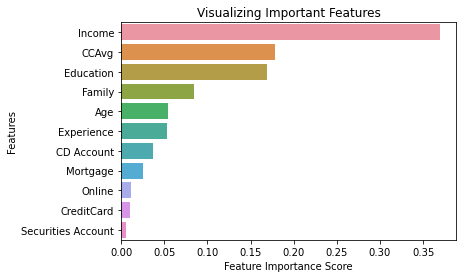

In [27]:
#Find the optimal Features via Random Forest(EDA)
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier().fit(Features_train, Target_train) 
fearure_importance = pd.Series(forest.feature_importances_, index=feture_name).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=fearure_importance, y=fearure_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Mortgage             -0.027384
Online               -0.015612
Age                  -0.015132
Experience           -0.012266
CreditCard           -0.005567
Family                0.012296
Securities Account    0.016977
Education             0.097033
CD Account            0.245397
CCAvg                 0.328350
Income                0.466305
dtype: float64


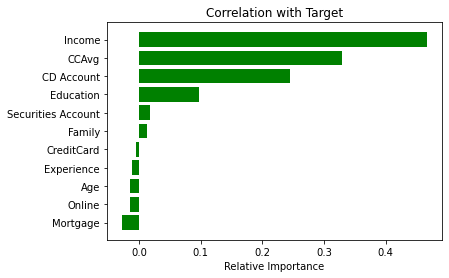

In [28]:
#Identify input features having high correlation with target variable
import numpy as np
importances = Features.apply(lambda x: x.corr(Target))
indices = np.argsort(importances)
print(importances[indices])

#Plot the results
plt.title('Correlation with Target')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feture_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
#Remove the last 3 columns since the imprtance of them is low
decision_tree.drop(['Online', 'CreditCard','Securities Account'], axis=1, inplace=True)
new_features_name = ['Age','Experience','Income','Family' ,'CCAvg','Education','Mortgage', 'CD Account']
optimal_Features = decision_tree[new_features_name]

In [30]:
#Find the optimal Hyperparameters via GridSearchCV and 10- fold Cross validation 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

hyper_dictionary = {'criterion': ['gini', 'entropy'],
                   'max_depth' : range(1,15,1)} #The parameters for punning
                   
grid = GridSearchCV(tree, param_grid= hyper_dictionary,
                   cv = StratifiedKFold(n_splits=10), #10-fold cross validation
                   verbose= 3, 
                   scoring = 'accuracy')
grid.fit(optimal_Features, Target)
print('*'*100)
print("The best hyperparameters are: ", grid.best_params_)
print("The best score is: ", grid.best_score_)
print("The best estimator is: ", grid.best_estimator_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 2/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 3/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 4/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 5/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 6/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 7/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 8/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 9/10] END ...................criterion=gini, max_depth=1; total time=   0.0s
[CV 10/10] END ..................criterion=gini, max_depth=1; total time=   0.0s
[CV 1/10] END ...................criterion=gini, max_depth=2; total time=   0.0s
[CV 2/10] END ...................criterion=gin

[CV 4/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 5/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 6/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 7/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 8/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 9/10] END ..................criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END .................criterion=gini, max_depth=12; total time=   0.0s
[CV 1/10] END ..................criterion=gini, max_depth=13; total time=   0.0s
[CV 2/10] END ..................criterion=gini, max_depth=13; total time=   0.0s
[CV 3/10] END ..................criterion=gini, max_depth=13; total time=   0.0s
[CV 4/10] END ..................criterion=gini, max_depth=13; total time=   0.0s
[CV 5/10] END ..................criterion=gini, max_depth=13; total time=   0.0s
[CV 6/10] END ..............

[CV 7/10] END ................criterion=entropy, max_depth=8; total time=   0.0s
[CV 8/10] END ................criterion=entropy, max_depth=8; total time=   0.0s
[CV 9/10] END ................criterion=entropy, max_depth=8; total time=   0.0s
[CV 10/10] END ...............criterion=entropy, max_depth=8; total time=   0.0s
[CV 1/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 2/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 3/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 4/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 5/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 6/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 7/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 8/10] END ................criterion=entropy, max_depth=9; total time=   0.0s
[CV 9/10] END ..............


*********************************** Results with 10-Folds Cross Validation ***********************************


****************************** The Hyperparameters of the Decision tree ******************************
DecisionTreeClassifier(criterion='entropy', max_depth=6)

****************************** Accuracy *********************************************
The Decsion tree's accuracy with 10-fold cross calidation:  0.9845387243735765

****************************************************************************************************
For the 0 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9795454545454545
For the 1 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9840909090909091
For the 2 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9818181818181818
For the 3 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9863636363636363
For the 4 fold of the decision

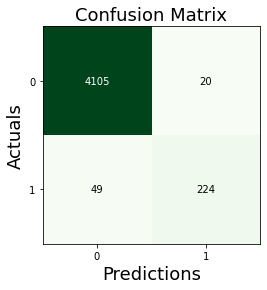


*********************************** Classification Report with 10 fold Cross Validation ***********************************
              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99      4125
     class 1       0.92      0.82      0.87       273

    accuracy                           0.98      4398
   macro avg       0.96      0.91      0.93      4398
weighted avg       0.98      0.98      0.98      4398



In [31]:
#Apply The best estimator, 10-fold Cross validation to find the optimal DT with out SMOTE method

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
print("\n" + ('*'*35)+' Results with 10-Folds Cross Validation '+("*"*35))
print()
print("\n" + ('*'*30)+' The Hyperparameters of the Decision tree '+("*"*30))
best_model_without_SMOTE = grid.best_estimator_
print(best_model_without_SMOTE)
print("\n" + ('*'*30)+' Accuracy '+("*"*45))
scores = cross_val_score(best_model_without_SMOTE, optimal_Features, Target, cv=10, scoring = 'accuracy')
print("The Decsion tree's accuracy with 10-fold cross calidation: ", scores.mean())
print("\n" + ("*" * 100))
for i in range(0, len(scores)):
    print("For the", str(i) + " fold of the decision tree using 10 - kfold cross validation the accuracy is: ", scores[i])

#confusion matrix with 10 fold cross validation

print('\n' + ('*'*35)+ ' Confushion Matrix with 10 fold cross validation '+('*'*30))
y_pred = cross_val_predict(best_model_without_SMOTE, optimal_Features, Target, cv=10)
conf_mat_without_SMOTE = confusion_matrix(Target, y_pred)
print(conf_mat_without_SMOTE)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_without_SMOTE, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n' + ('*'*35)+ ' Classification Report with 10 fold Cross Validation '+('*'*35))
print(classification_report(Target, cross_val_predict(best_model_without_SMOTE, optimal_Features, Target, cv=10), target_names=target_names))

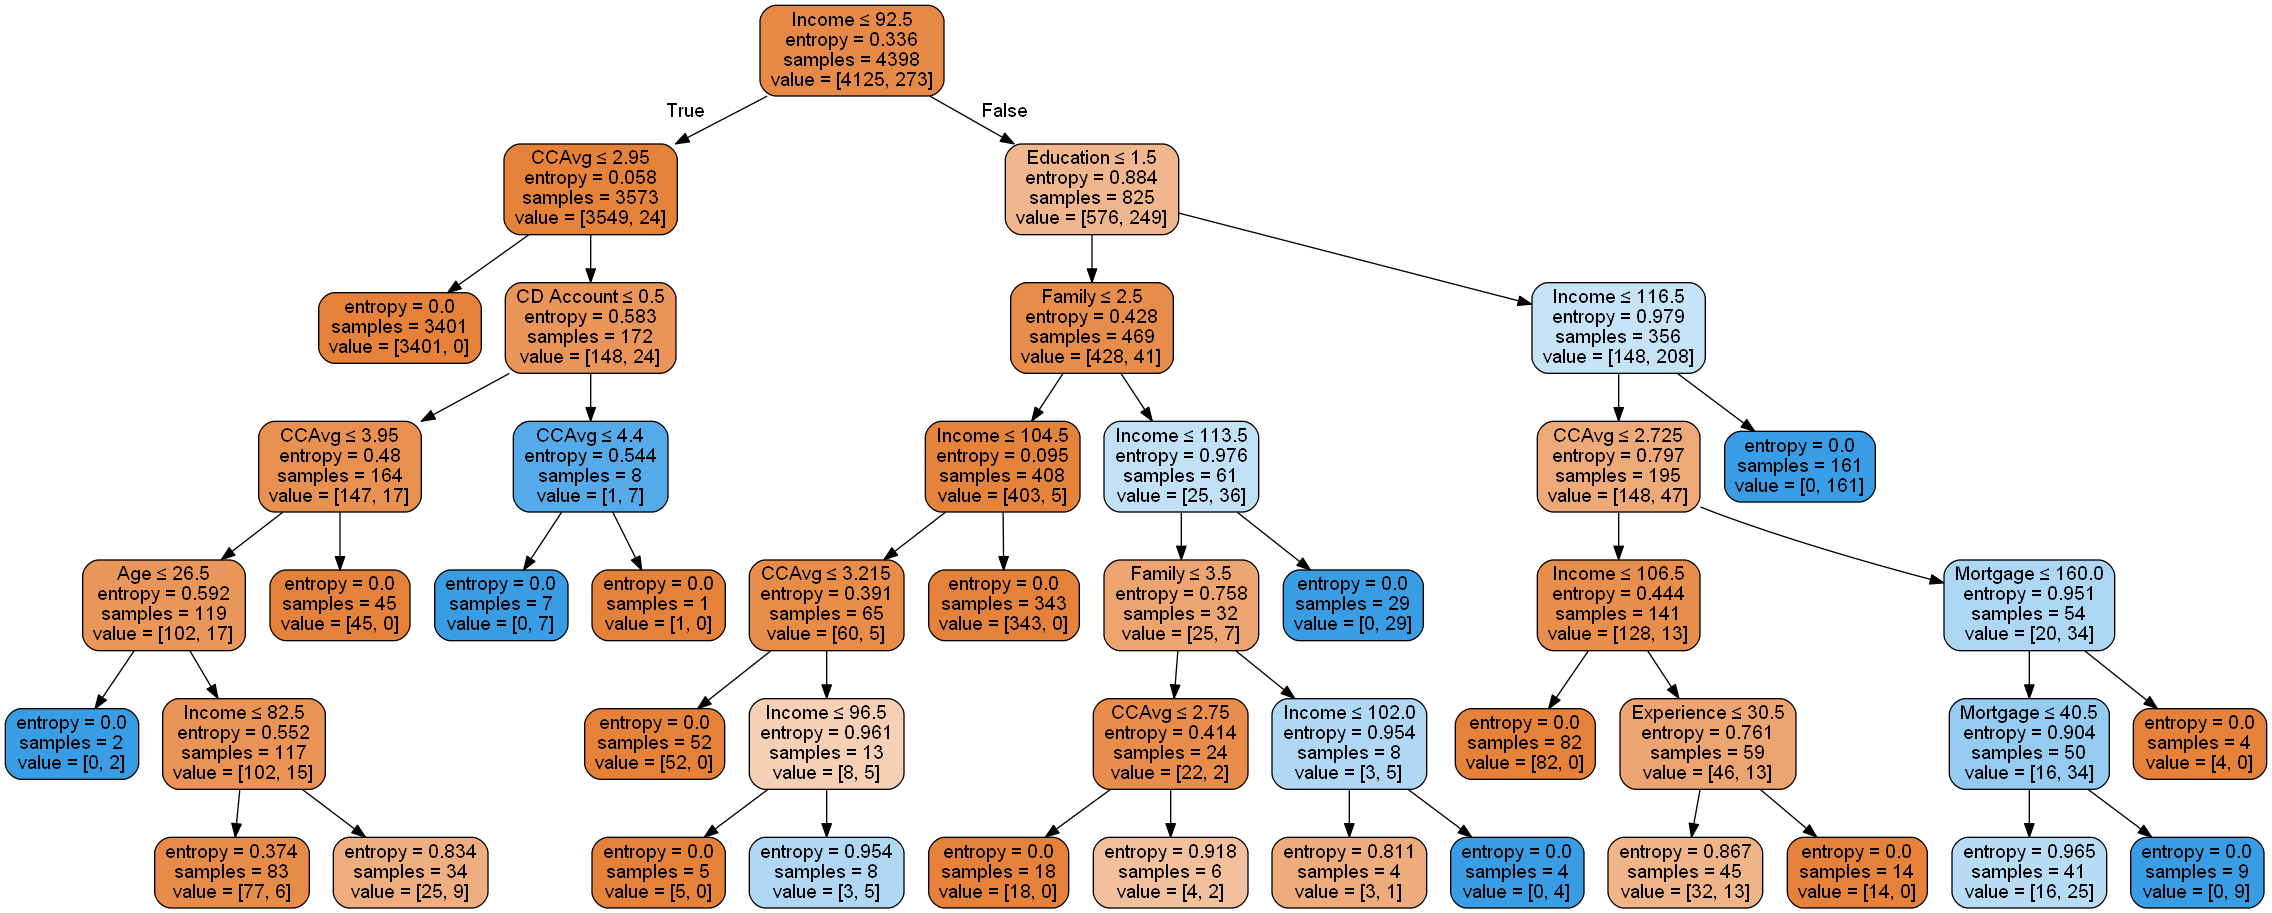

In [32]:
#Visualize the optimal DT with out SMOTE method

dot_data = StringIO()
export_graphviz(best_model_without_SMOTE.fit( optimal_Features, Target), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = new_features_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Optimal_DecisionTree.png')
Image(graph.create_png())

In [33]:
'''
Summary: 

For this model, we find the best features via RandomForest, we apply Gridsearch to find the optimal hyperparameters (critirion and max_depth) for the DecsionTree
and lastly we apply 10-fold cross validation, still we have a high accuracy, BUT we have a slide imprvment for Precision, Recall and F1-score.
'''

'\nSummary: \n\nFor this model, we find the best features via RandomForest, we apply Gridsearch to find the optimal hyperparameters (critirion and max_depth) for the DecsionTree\nand lastly we apply 10-fold cross validation, still we have a high accuracy, BUT we have a slide imprvment for Precision, Recall and F1-score.\n'

In [34]:
'''
Last step for the 1st Senario:
Apply Smote method, find again the optimal Hyperparameters , but this time we will take a look for the alpha parameter (Cost_Complexity_Prunning) with cross validation 
Apply 10 fold cross validation for the optimal SMOTE DecsionTree
'''

'\nLast step for the 1st Senario:\nApply Smote method, find again the optimal Hyperparameters , but this time we will take a look for the alpha parameter (Cost_Complexity_Prunning) with cross validation \nApply 10 fold cross validation for the optimal SMOTE DecsionTree\n'

SMOTE Target shape Counter({0: 4125, 1: 4125})

************************* The Target with SMOTE Method *************************


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

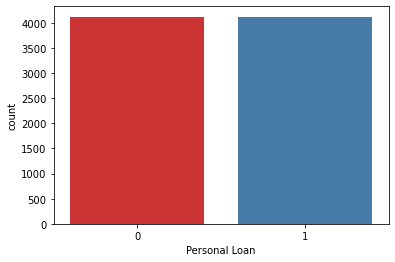

In [35]:
DT_smote = data.copy() #Copy the original Dataset

#SMOTE Method
from imblearn.over_sampling import SMOTE
sm = SMOTE()
Features_smote, Target_smote = sm.fit_resample(Features, Target) 
print('SMOTE Target shape %s' % Counter(Target_smote))
print('\n' + ("*"*25) + " The Target with SMOTE Method "+ ("*" * 25))
sns.countplot(x=Target_smote, palette = 'Set1')

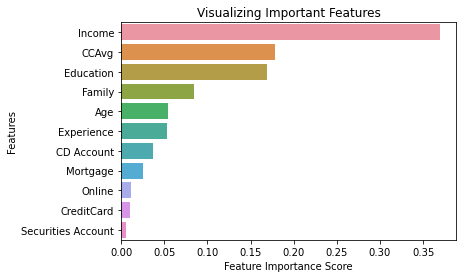

In [36]:
#Feature Selection Via RandomForest
forest_smote = RandomForestClassifier().fit(Features_smote, Target_smote) 
fearure_importance_smote = pd.Series(forest_smote.feature_importances_, index=feture_name).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=fearure_importance, y=fearure_importance.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [37]:
#Delete the same columns as before SMOTE method
#Remove the last 3 columns since the imprtance of them is low
Features_smote.drop(['Online', 'CreditCard','Securities Account'],axis=1,inplace=True)
new_features_name_SMOTE = ['Age','Experience','Income','Family' ,'CCAvg','Education','Mortgage', 'CD Account']
optimal_Features_smote= Features_smote[new_features_name_SMOTE]

In [38]:
#HyperParameters for the SMOTE datset using GridsearchCV with 10 fold cross validation
import numpy as np
smote_tree = DecisionTreeClassifier()

hyper_dictionary_smote = {'criterion': ['gini', 'entropy'],
                   'max_depth' : range(1,15,1),
                   'ccp_alpha' : np.linspace(0,0.001,10)} #The parameters for punning
                            
grid_smote = GridSearchCV(smote_tree, param_grid= hyper_dictionary_smote,
                   cv = StratifiedKFold(n_splits=10), #10-fold cross validation
                   verbose= 3, 
                   scoring = 'accuracy')
grid_smote.fit(optimal_Features_smote, Target_smote)
print('\n'+('*'*100))
print("The best hyperparameters are: ", grid_smote.best_params_)
print("The best score is: ", grid_smote.best_score_)
print("The best estimator is: ", grid_smote.best_estimator_)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
[CV 1/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 2/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 3/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 4/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 5/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 6/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 7/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 8/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 9/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 10/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV 1/10] END ....ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV 2/10] END ....ccp_alpha=0.0, criterion=g

[CV 6/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=11; total time=   0.0s
[CV 7/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=11; total time=   0.0s
[CV 8/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=11; total time=   0.0s
[CV 9/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=11; total time=   0.0s
[CV 10/10] END ..ccp_alpha=0.0, criterion=gini, max_depth=11; total time=   0.0s
[CV 1/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 2/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 3/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 4/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 5/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 6/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 7/10] END ...ccp_alpha=0.0, criterion=gini, max_depth=12; total time=   0.0s
[CV 8/10] END ...ccp_alpha=0

[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=7; total time=   0.0s
[CV 1/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 2/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 3/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 4/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 5/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 6/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 7/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 8/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 9/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0, criterion=entropy, max_depth=8; total time=   0.0s
[CV 1/10] END .ccp_alpha=0.0, criterion=entropy, max_depth=9; total time=   0.0s
[CV 2/10] END .ccp_alpha=0.0

[CV 8/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=3; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=3; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=3; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=4; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0001111111111

[CV 9/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=12; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00011111111111111112, criterion=gini, max_depth=13; total time=   0.0s
[CV 9/10] END ccp_alpha=0.000

[CV 3/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=7; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=8; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00011111111111111112, criterion=entropy, max_depth=8; total time=   0.0s
[CV 3/10]

[CV 8/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=2; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=2; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=2; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=3; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0002222222222

[CV 10/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=11; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00022222222222222223, criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00

[CV 6/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=6; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=6; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=6; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=6; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=6; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=7; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=7; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=7; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=7; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00022222222222222223, criterion=entropy, max_depth=7; total time=   0.0s
[CV 6/10]

[CV 4/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=1; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=2; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=2; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=2; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0003333333333333334, cr

[CV 4/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=10; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=11; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=11; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0003333333333333334, criterion=gini, max_depth=11; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0003333333333

[CV 1/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=5; total time=   0.0s
[CV 1/10] END ccp_a

[CV 8/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=13; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=13; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=13; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0003333333333333334, criterion=entropy, max_depth=14; total time=   0.0s
[CV 8/10]

[CV 1/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00044444444444444447, criterion=gini, max_depth=9; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0004444444444

[CV 5/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 10/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=3; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=4; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=4; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=4; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=4; total time=   0.0s
[CV 5/10]

[CV 10/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=11; total time=   0.0s
[CV 1/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 2/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 3/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 4/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 5/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 6/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 7/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 8/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s
[CV 9/10] END ccp_alpha=0.00044444444444444447, criterion=entropy, max_depth=12; total time=   0.0s

[CV 6/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=6; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=6; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=6; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=6; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=6; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=7; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=7; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=7; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=7; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0005555555555555556, criterion=gini, max_depth=7; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0005555555555555556, cr

[CV 3/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=1; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=2; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=2; total time=   0.0s
[CV 3/10] END ccp_a

[CV 1/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0005555555555555556, criterion=entropy, max_depth=10; total time=   0.0s
[CV 1/10]

[CV 7/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=4; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=4; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=4; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=4; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=5; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0006666666666666668, cr

[CV 9/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=13; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=13; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0006666666666666668, criterion=gini, max_depth=14; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0006666666666

[CV 9/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=8; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=8; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0006666666666666668, criterion=entropy, max_depth=9; total time=   0.0s
[CV 9/10] END ccp_a

[CV 8/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=3; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=3; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=3; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=4; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0007777777777777778, cr

[CV 7/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=12; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=12; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=12; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0007777777777777778, criterion=gini, max_depth=13; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0007777777777

[CV 2/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=7; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0007777777777777778, criterion=entropy, max_depth=8; total time=   0.0s
[CV 2/10] END ccp_a

[CV 7/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=2; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=2; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=2; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=2; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=3; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0008888888888888889, cr

[CV 1/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 7/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0008888888888888889, criterion=gini, max_depth=12; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0008888888888

[CV 7/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=6; total time=   0.0s
[CV 8/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=6; total time=   0.0s
[CV 9/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=6; total time=   0.0s
[CV 10/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=6; total time=   0.0s
[CV 1/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 2/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 3/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 4/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 5/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 6/10] END ccp_alpha=0.0008888888888888889, criterion=entropy, max_depth=7; total time=   0.0s
[CV 7/10] END ccp_a

[CV 4/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 5/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 6/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 7/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 8/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 9/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 10/10] END .ccp_alpha=0.001, criterion=gini, max_depth=2; total time=   0.0s
[CV 1/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=3; total time=   0.0s
[CV 2/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=3; total time=   0.0s
[CV 3/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=3; total time=   0.0s
[CV 4/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=3; total time=   0.0s
[CV 5/10] END ..ccp_alpha=0.001, criterion=gini, max_depth=3; total time=   0.0s
[CV 6/10] END ..ccp_alpha=0.

[CV 9/10] END .ccp_alpha=0.001, criterion=gini, max_depth=12; total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=gini, max_depth=12; total time=   0.0s
[CV 1/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 2/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 3/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 4/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 5/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 6/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 7/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 8/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 9/10] END .ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=gini, max_depth=13; total time=   0.0s
[CV 1/10] END .ccp_alpha=0.0

[CV 6/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9; total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9; total time=   0.0s
[CV 8/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9; total time=   0.0s
[CV 9/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9; total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9; total time=   0.0s
[CV 1/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 2/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 3/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 4/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 5/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 6/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=entropy, max_depth=10; total time=   0.0s
[CV 8/10

In [39]:
#Use of cost complexity prunning to make sure that we have the correct ccp_alpha
#Cost complexity prunning to find the optimal value of alpha
ccp_model = DecisionTreeClassifier()
path = ccp_model.cost_complexity_pruning_path(optimal_Features_smote, Target_smote) #determine values for alpha 
ccp_alphas = path.ccp_alphas #extract different values for alpha 
ccp_alphas = ccp_alphas[:-1] #fing the maximum values
        
#create one decision tree per value for alpha and store them in the list 
clf_alpha_list = []
for ccp_alpha in ccp_alphas:
            clf_ccp_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha) 
            clf_ccp_alpha.fit(optimal_Features_smote, Target_smote)
            clf_alpha_list.append(clf_ccp_alpha)
print('\n'+('*'*35) + ' The values for alha '+ ('*'*35))
print("ccp_alphas:\n",ccp_alphas)


*********************************** The values for alha ***********************************
ccp_alphas:
 [0.00000000e+00 7.94612795e-05 8.00457404e-05 8.06260806e-05
 1.11111111e-04 1.12554113e-04 1.16550117e-04 1.16883117e-04
 1.17748918e-04 1.17936118e-04 1.19480519e-04 1.19637938e-04
 1.19668018e-04 1.20417173e-04 1.20736780e-04 1.23289339e-04
 1.53806977e-04 1.55844156e-04 1.59129759e-04 1.61616162e-04
 1.61616162e-04 1.61616162e-04 1.61616162e-04 1.79099483e-04
 1.81818182e-04 1.81818182e-04 1.84613274e-04 1.93939394e-04
 1.93939394e-04 1.93939394e-04 1.95093795e-04 2.02020202e-04
 2.07792208e-04 2.07792208e-04 2.10053476e-04 2.18181818e-04
 2.20385675e-04 2.23457908e-04 2.23776224e-04 2.23776224e-04
 2.23814643e-04 2.24181206e-04 2.29320229e-04 2.30694656e-04
 2.32229742e-04 2.34791680e-04 2.34848485e-04 2.36914601e-04
 2.39764934e-04 2.42424242e-04 2.48640249e-04 2.90909091e-04
 3.05916306e-04 3.21302122e-04 3.32132970e-04 3.46320346e-04
 3.57817568e-04 3.58041958e-04 3.6730945

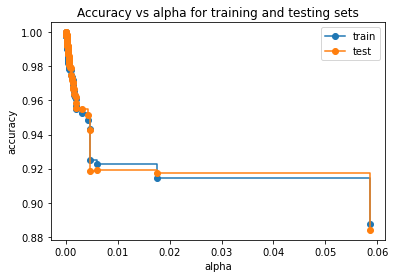

In [40]:
X_train, X_test, ytrain, ytest = train_test_split(optimal_Features_smote, Target_smote, test_size=0.3, random_state=1) # 70% training and 30% test based on the smote method 

train_score = [clf_dt.score(X_train,ytrain) for clf_dt in clf_alpha_list] #Return (float) the mean accuracy on the given test data  
test_score = [clf_dt.score(X_test,ytest) for clf_dt in clf_alpha_list]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_score, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas,test_score, marker = 'o', label = "test",drawstyle = "steps-post")
ax.legend()
plt.show()

The accuracy of the Decision tree smote method and 10 fold cross validation:  0.9852121212121212

****************************************************************************************************
For the 0 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9795454545454545
For the 1 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9840909090909091
For the 2 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9818181818181818
For the 3 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9863636363636363
For the 4 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9840909090909091
For the 5 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9795454545454545
For the 6 fold of the decision tree using 10 - kfold cross validation the accuracy is:  0.9863636363636363
For the 7 fold of the decision tree using 10 - kfold

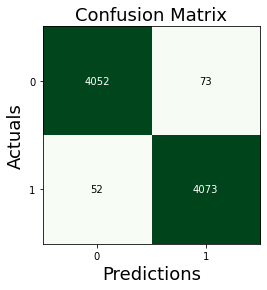


************************************************** Recall **************************************************
The Recall score for the 10 fold is:  0.9684466019417476
The Recall score for the 10 fold is:  0.9878640776699029
The Recall score for the 10 fold is:  0.9878640776699029
The Recall score for the 10 fold is:  1.0
The Recall score for the 10 fold is:  0.9902912621359223
The Recall score for the 10 fold is:  0.9903147699757869
The Recall score for the 10 fold is:  0.9951573849878934
The Recall score for the 10 fold is:  0.9854721549636803
The Recall score for the 10 fold is:  0.9854721549636803
The Recall score for the 10 fold is:  0.9830508474576272
Recall mean 0.9873933331766143

**************************************************************************************************************

************************************************** Precision **************************************************
The Precision score for the 10 fold is:  0.9827160493827161
The Precision score

In [41]:
#Best tree with smote method
best_model_with_SMOTE = grid_smote.best_estimator_

#Accuracy with smote method and 10 fold cross validation
scores_SM = cross_val_score(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10, scoring = 'accuracy')
print("The accuracy of the Decision tree smote method and 10 fold cross validation: ", scores_SM.mean())
print("\n" + ("*" * 100))
for i in range(0, len(scores_SM)):
    print("For the", str(i) + " fold of the decision tree using 10 - kfold cross validation the accuracy is: ", scores[i])


#confusion matrix SMOTE
from sklearn.model_selection import cross_val_predict
print("\n" + ("*"*35)+'Confusion Matrix with SMOTE Methos and CV'+('*'*35))
y_pred = cross_val_predict(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10)
conf_mat_SMOTE = confusion_matrix(Target_smote, y_pred)
print(conf_mat_SMOTE)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SMOTE, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Recall for each fold
print('\n'+('*'*50) + ' Recall '+ ('*'*50))
recall_score = cross_val_score(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10 ,scoring='recall')
for recall in recall_score: 
  print('The Recall score for the 10 fold is: ', recall)
print('Recall mean', np.mean(recall_score))
print('\n'+ ('*'*110))

#Precision for each fold
print('\n'+('*'*50) + ' Precision '+ ('*'*50))
precision_score = cross_val_score(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10 , scoring='precision')
for precision in precision_score: 
  print('The Precision score for the 10 fold is: ', precision)
print('precision mean', np.mean(precision_score))
print('\n'+ ('*'*110))

#F1-score for each fold
print('\n'+('*'*50) + ' F1-score '+ ('*'*50))
f1_score = cross_val_score(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10, scoring='f1')
for f1 in f1_score: 
  print('The Precision score for the 10 fold is: ', f1)
print('f1 mean', np.mean(f1_score))
print('\n'+ ('*'*110))
print('\n'+('*'*50) + ' Dataframe for DT '+ ('*'*50))
dt_decisiontree = pd.DataFrame({'Accuracy': scores_SM,  'Recall': recall_score, 
                                'Precision':precision_score, 'F1-score':f1_score})

print(dt_decisiontree)
#Recall , Presion, F1-score Report
target_names = ['class 0', 'class 1']
print('\n'+('*'*35) + ' Classification Report with SMOTE Method and CV '+ ('*'*35))
print(classification_report(Target_smote, cross_val_predict(best_model_with_SMOTE, optimal_Features_smote, Target_smote, cv=10), target_names=target_names))

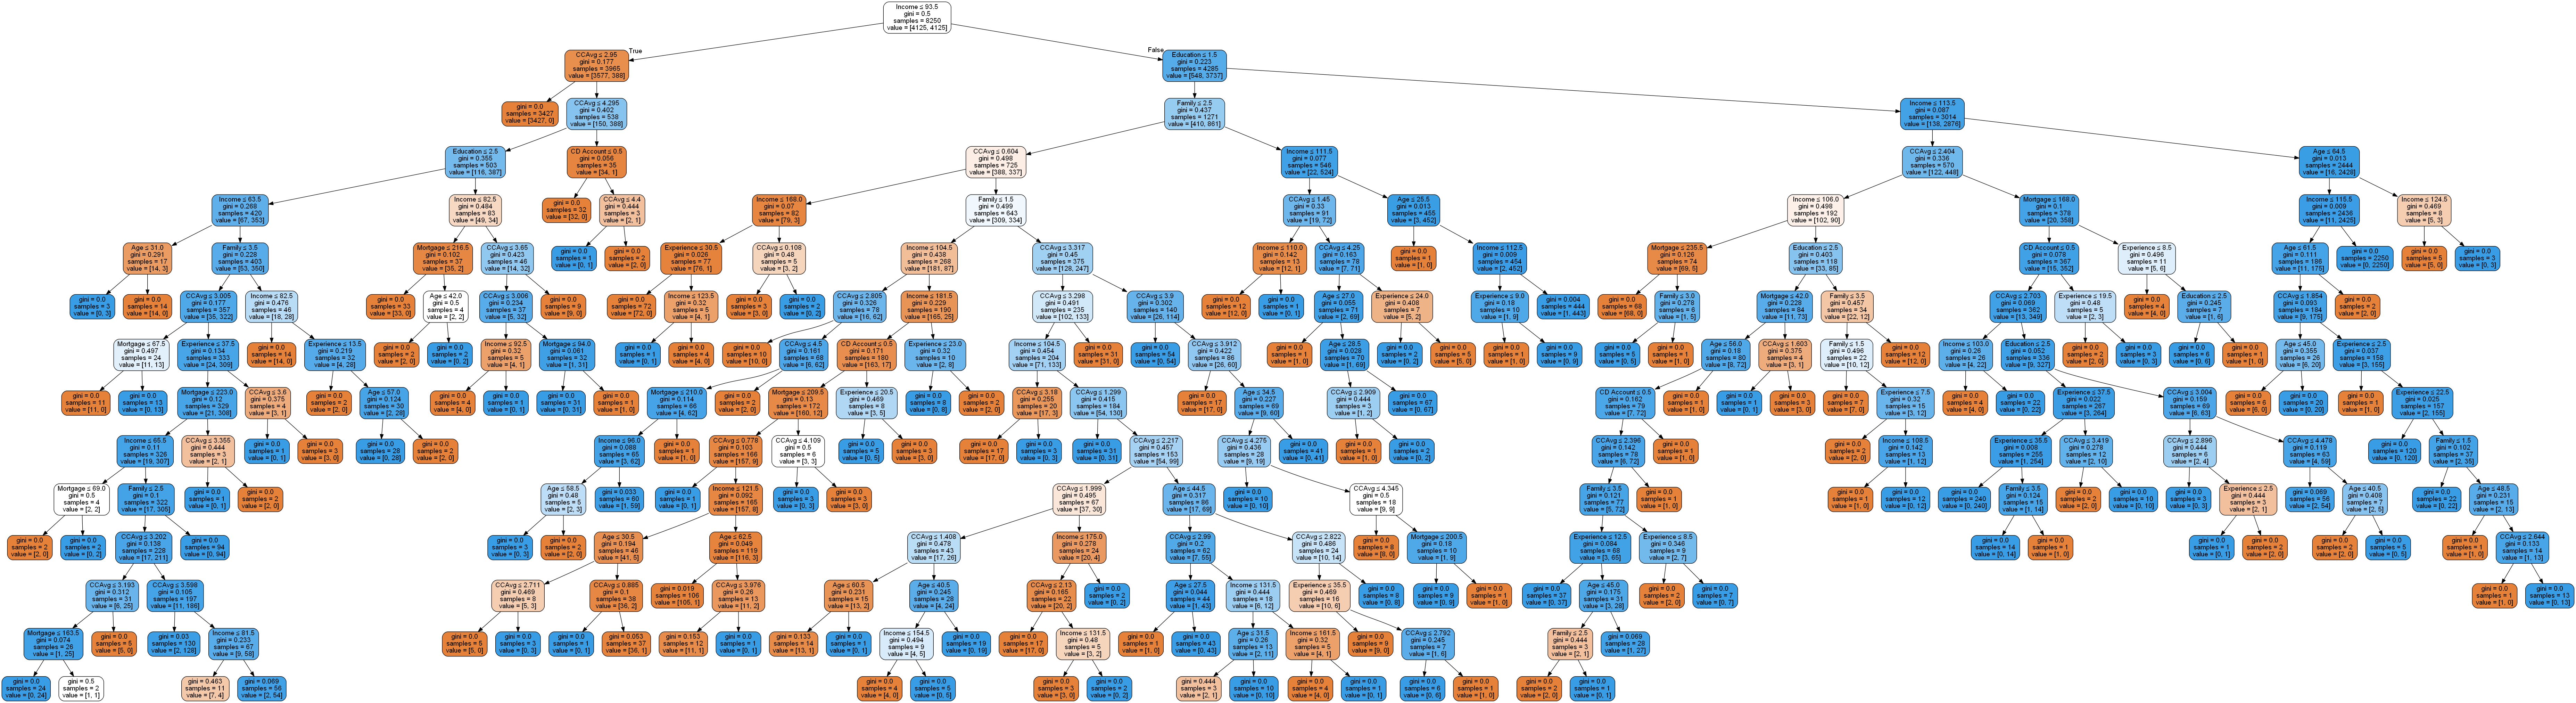

In [42]:
dot_data = StringIO()
export_graphviz(best_model_with_SMOTE.fit(optimal_Features_smote, Target_smote), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = new_features_name_SMOTE)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('SMOTE_DecisionTree.png')
Image(graph.create_png())

In [43]:
#Voting-based Ensemble technique Learning
#Import the librarues that are needed
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
import numpy as np

#Find the best Hyperparameters for each model and use of 10-fold cross validation
# For GaussianNB
# var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# For Decision Tree
params_DT = {'criterion': ['gini', 'entropy'],
                   'max_depth' : range(1,15,1)}

# For RandomForest
params_RF = {'n_estimators': np.arange(50,350,20)}

#For SVM
params_SVM ={'kernel':('linear', 'poly', 'rbf')}
classifiers = [GaussianNB(), DecisionTreeClassifier(),  RandomForestClassifier(), svm.SVC()]
               
parameters = [params_NB, params_DT, params_RF, params_SVM]
model_list = ['Naive Bayes', 'DecsionTree', 'RandomForest', 'VotingClassifier']

In [44]:
#Voting and find the best model by the accuracy
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import StratifiedKFold

results = []
best_params = []
for i in range(len(classifiers)):
  vote_grid = GridSearchCV(classifiers[i],
                           param_grid=[parameters[i]],
                           cv =  StratifiedKFold(n_splits=10),
                           scoring = 'accuracy')
  
  vote_grid.fit(optimal_Features_smote, Target_smote)
  results.append(vote_grid.best_score_)
  best_params.append(vote_grid.best_estimator_)
  print('Method: {}  Score: {} Best: {}' .format(classifiers[i], results[i], vote_grid.best_estimator_))

Method: GaussianNB()  Score: 0.9146666666666666 Best: GaussianNB(var_smoothing=6.579332246575683e-05)
Method: DecisionTreeClassifier()  Score: 0.9847272727272728 Best: DecisionTreeClassifier(max_depth=14)
Method: RandomForestClassifier()  Score: 0.9907878787878788 Best: RandomForestClassifier(n_estimators=210)
Method: SVC()  Score: 0.9136969696969697 Best: SVC(kernel='linear')


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


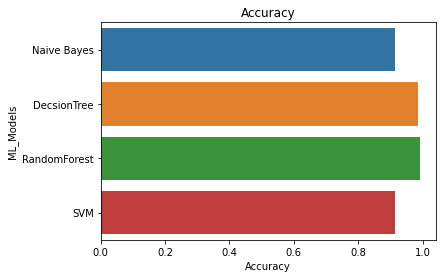

In [45]:
model_name =['Naive Bayes', 'DecsionTree', 'RandomForest', 'SVM']
bar = pd.DataFrame({'Accuracy':results,'ML_Models':model_name})
import seaborn as sns
import matplotlib.pyplot as plt

clfs = sns.barplot('Accuracy','ML_Models',data=bar)
clfs.set_title('Accuracy')
plt.show()

In [46]:
#VotingClassfier
'''
Hard Voting: the VotingClassifier (with voting='hard') would classify the sample as “class 1” based on the majority class label.
'''
vote = []
for clf, name in zip(best_params, model_name):
    vote.append((str(name), clf))

Voting = VotingClassifier(estimators=vote,  voting='hard')
best_params.append(Voting)

for clf, label in zip(best_params, ['Naive Bayes',  'DecisionTree','Random Forest', 'SVM','Ensemble']):
     scores = cross_val_score(clf, optimal_Features_smote, Target_smote, scoring='accuracy', cv=10) # 10 fold cross calidation
     print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label)) 



Accuracy: 0.9147 (+/- 0.0089) [Naive Bayes]
Accuracy: 0.9852 (+/- 0.0042) [DecisionTree]
Accuracy: 0.9902 (+/- 0.0048) [Random Forest]
Accuracy: 0.9137 (+/- 0.0072) [SVM]
Accuracy: 0.9688 (+/- 0.0051) [Ensemble]


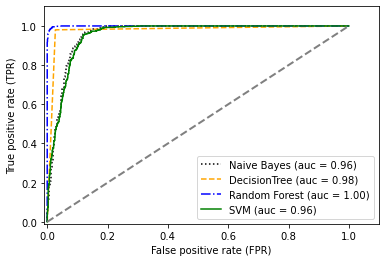

In [47]:
'''
compute the ROC curves from the test dataset to 
check the Clasifiers if they generalizes well with unseen data
'''

import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-', 'dashdot']
labels = ['Naive Bayes',  'DecisionTree','Random Forest', 'SVM']

del best_params[3:] #Delete SVM and voting
best_params.append(svm.SVC(kernel='linear', probability=True))  #add SVM with  prbability = True 

for clf, label, color, line in zip(best_params, labels, colors, linestyles):
  Xtrain, Xtest, ytrain, ytest = train_test_split(optimal_Features_smote, Target_smote, test_size=0.30) #Train, test, 30%
  
  y_pred = clf.fit(Xtrain, ytrain).predict_proba(Xtest)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true=ytest,  y_score=y_pred)

  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=color,linestyle=line, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.01, 1.1])
plt.ylim([-0.01, 1.1])
#plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [48]:
######################################################################### End of the First Senario ############################################################################

In [49]:
######################################################################### Third Senario #######################################################################################

In [50]:
'''
Third Senario Steps: 
-> Check the relationship between every numeric feature in the dataset
-> Choose the relationship to apply the clustering algorithm, in this senario we will choose the 'Income' and 'CCAvg', which corresponds to the annual income of the customer 
and the amound of spending miney per month, with this way we will cluster the customers based on their income and how much they spend per month
->Algorithm: 
  ->Use elbow method to find the optimal clusters and use of silhoullette vaue method to confirm that we found the optimal 'K'
  ->Use silhouette plots to evaluate the quality of the clustering
  ->visulaize the clusters 
'''

"\nThird Senario Steps: \n-> Check the relationship between every numeric feature in the dataset\n-> Choose the relationship to apply the clustering algorithm, in this senario we will choose the 'Income' and 'CCAvg', which corresponds to the annual income of the customer \nand the amound of spending miney per month, with this way we will cluster the customers based on their income and how much they spend per month\n->Algorithm: \n  ->Use elbow method to find the optimal clusters and use of silhoullette vaue method to confirm that we found the optimal 'K'\n  ->Use silhouette plots to evaluate the quality of the clustering\n  ->visulaize the clusters \n"

In [51]:
#Clusterring is used for unlabel data thus we will use only Age	Experience	Income CCAvg features 
Cluster_Features = ['Age',	'Experience',	'Income', 'CCAvg', 'Securities Account']
Cluster_data = data.copy()# Copy the data

unlabel_Data = Cluster_data[Cluster_Features] #use only unlabel features 
print('\n'+('*'*35)+' Unlabel Data for Clustering '+('*'*35))
print(unlabel_Data.head())
print('\n'+('*'*35)+' Unlabel Data Description '+('*'*35))
print(unlabel_Data.describe())


*********************************** Unlabel Data for Clustering ***********************************
   Age  Experience  Income  CCAvg  Securities Account
0   25           1      49    1.6                   1
1   45          19      34    1.5                   1
2   39          15      11    1.0                   0
3   35           9     100    2.7                   0
4   35           8      45    1.0                   0

*********************************** Unlabel Data Description ***********************************
               Age   Experience       Income        CCAvg  Securities Account
count  4398.000000  4398.000000  4398.000000  4398.000000         4398.000000
mean     45.536608    20.294679    64.084584     1.551146            0.104366
std      11.490289    11.483087    38.024646     1.157534            0.305769
min      23.000000     0.000000     8.000000     0.000000            0.000000
25%      35.000000    10.000000    35.000000     0.600000            0.000000
50%      

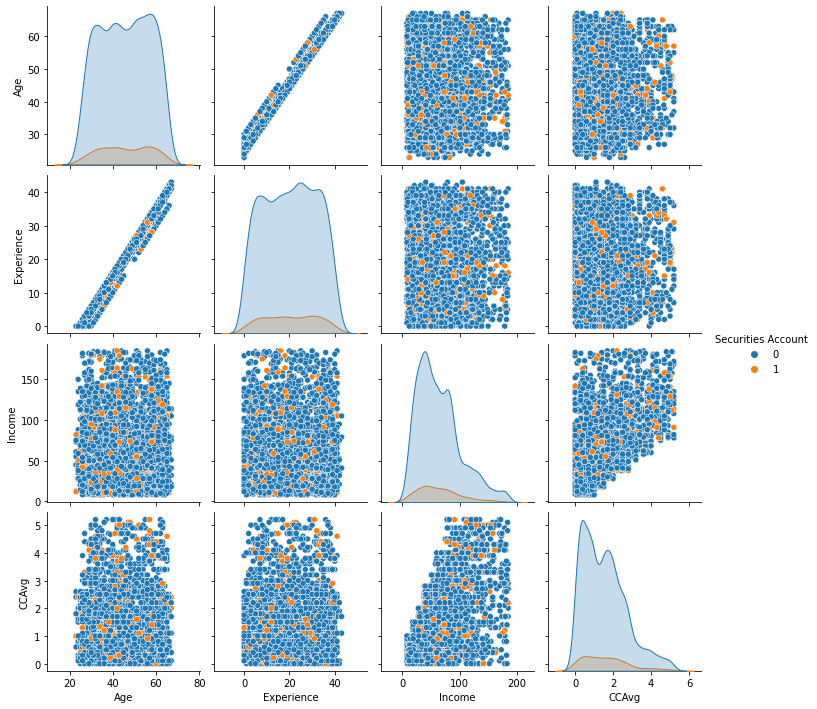

In [52]:
#Create a pair plot to find the relationships between each feature
sns.pairplot(data = unlabel_Data, hue = 'Securities Account')

In [53]:
clusters = unlabel_Data[['Income',	'CCAvg']].copy() #use only 'Income' and 'CCAvg' for clustering
print('\n'+('*'*30)+'Income and CCAvg'+('*'*35))
print(clusters.head())
print('\n'+('*'*30)+'Description'+('*'*35))
print(clusters.describe())


******************************Income and CCAvg***********************************
   Income  CCAvg
0      49    1.6
1      34    1.5
2      11    1.0
3     100    2.7
4      45    1.0

******************************Description***********************************
            Income        CCAvg
count  4398.000000  4398.000000
mean     64.084584     1.551146
std      38.024646     1.157534
min       8.000000     0.000000
25%      35.000000     0.600000
50%      58.000000     1.400000
75%      83.000000     2.200000
max     185.000000     5.200000



*********************************** Dataframe of the Clusters and SSE ***********************************
   Cluster           sse
0        2  2.156049e+06
1        3  9.115092e+05
2        4  5.879156e+05
3        5  3.640686e+05
4        6  2.506244e+05

*********************************** Plot the Elbow Method ***********************************


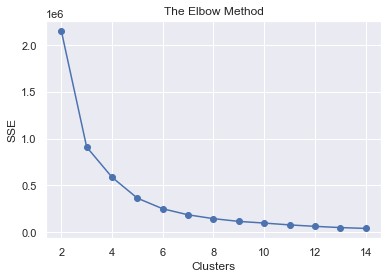


*********************************** Silhouette value Method ***********************************


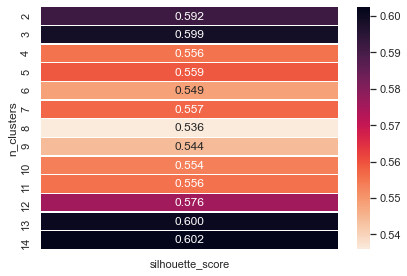

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
#Use of elbow method to find the number of Clusters
sse = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++' )
    kmeans.fit(clusters)
    sse.append(kmeans.inertia_)

#dataframe
print('\n'+('*'*35)+' Dataframe of the Clusters and SSE '+('*'*35))
cluster_df = pd.DataFrame({'Cluster':range(2,15), 'sse':sse})
print(cluster_df.head())

#plot the elbow method
print('\n'+('*'*35)+' Plot the Elbow Method '+('*'*35))
sns.set()
plt.plot(cluster_df['Cluster'], cluster_df['sse'], marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

# Silhouette value Method to identify the optimal value of K
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

results = []

for ran in range(2, 15):
  cluster = KMeans(init = 'k-means++', n_clusters= ran, n_init = 100, random_state = 0)
  cluster_labels = cluster.fit_predict(clusters)
  silhouette_avg = silhouette_score(clusters, cluster_labels )
  results.append([ran, silhouette_avg])

result = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot = pd.pivot_table(result, index = 'n_clusters', values = 'silhouette_score')
print('\n'+('*'*35)+' Silhouette value Method '+('*'*35))
plt.figure()
sns.heatmap(pivot, annot = True, linewidth = 0.5, fmt = '.3f', cmap = sns.cm.rocket_r)
plt.tight_layout()


*********************************** the optimal number of Clusters via Knee Method ***********************************
5

****************************** Plot the optimal number of Clusters via Knee Method ***********************************


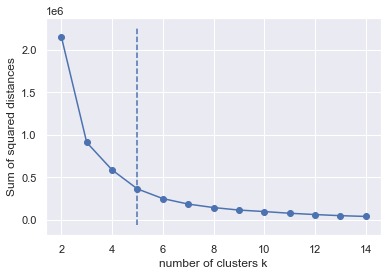

In [55]:
#use KneeLocator to fnd the optimal number of Clusters
!pip3 install kneed

from kneed import KneeLocator
knee_method = KneeLocator(range(2,15), sse, curve="convex", direction="decreasing" ) #If curve=”convex”, it will detect elbows
print('\n'+('*'*35)+' the optimal number of Clusters via Knee Method '+('*'*35))
print(knee_method.elbow)

#plot the optimal number of Clusters
print('\n'+('*'*30)+' Plot the optimal number of Clusters via Knee Method '+('*'*35))

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(2,15), sse, marker = 'o')
plt.vlines(knee_method.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')


*********************************** Dataframe with the Clusters ***********************************
   Income  CCAvg  Clusters
0      49    1.6         3
1      34    1.5         0
2      11    1.0         0
3     100    2.7         4
4      45    1.0         3

*********************************** The Centroids of each Cluster ***********************************
[[ 23.72711421   0.69921534]
 [158.28346457   2.68086614]
 [ 80.7612782    1.87092105]
 [ 50.19148936   1.49930679]
 [116.31512605   2.44506303]]

*********************************** Visualize the clusters ***********************************


Text(0, 0.5, 'CCAvg')

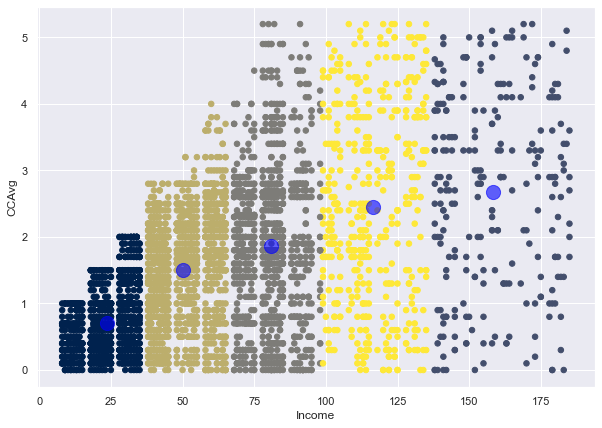

In [56]:
#use of the best number of Clusters 
kmeans_knee_method = KMeans( init = 'k-means++', n_clusters= knee_method.elbow, n_init = 100, random_state = 0)
kmeans_knee_method.fit(clusters)
predictions = kmeans_knee_method.predict(clusters)

#assing each customer to the cluster
clusters['Clusters'] = predictions
print('\n'+('*'*35)+' Dataframe with the Clusters '+('*'*35))
print(clusters.head())

#The Centroids of each Cluster
print('\n'+('*'*35)+' The Centroids of each Cluster '+('*'*35))
centroids = kmeans_knee_method.cluster_centers_
print(centroids)

#visualize the clusters
print('\n'+('*'*35)+' Visualize the clusters '+('*'*35))
plt.figure(figsize=(10,7))
plt.scatter(clusters['Income'], clusters['CCAvg'], c=predictions, s=30, cmap='cividis')
plt.scatter(kmeans_knee_method.cluster_centers_[:, 0], kmeans_knee_method.cluster_centers_[:, 1], c='blue', s=200, alpha=0.6)
plt.xlabel('Income')
plt.ylabel('CCAvg')

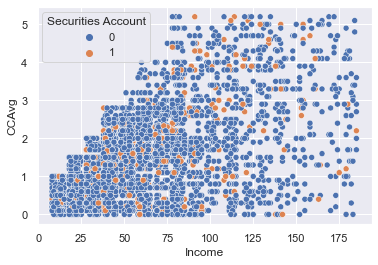

In [57]:
sns.scatterplot(data=Cluster_data, x="Income", y="CCAvg", hue = 'Securities Account')
plt.show()

In [58]:
######################################################################### End of third Senario ######################################################################################

In [59]:
######################################################################### Second  Senario ######################################################################################

In [60]:
'''
In this Senario we will aply SVM to check if a customer has a certificate of deposit or not
Steps: 
-> Small EDA for SVM based on the target column (CD Account) (Check if we have an unbalance dataset)
-> Apply a simple SVM (by default the parameters)
-> Find the optimal features via random forest 
-> Find the optimal features via another way
-> Use ine hot encoding 
-> Optimize the Hyperparameters with Gridsearch and 10-fold cross validation 
->SVM optimzed (with 10 fold cross validation) 
'''

'\nIn this Senario we will aply SVM to check if a customer has a certificate of deposit or not\nSteps: \n-> Small EDA for SVM based on the target column (CD Account) (Check if we have an unbalance dataset)\n-> Apply a simple SVM (by default the parameters)\n-> Find the optimal features via random forest \n-> Find the optimal features via another way\n-> Use ine hot encoding \n-> Optimize the Hyperparameters with Gridsearch and 10-fold cross validation \n->SVM optimzed (with 10 fold cross validation) \n'

In [61]:
svm_data = data.copy()
Features_SVM_name = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'Online', 'CreditCard']

Features_SVM = svm_data[Features_SVM_name] #Features for SVM
Target_SVM = svm_data['CD Account'] #Target for SVM


***********************************Counter of Target ***********************************
Original dataset shape Counter({0: 4191, 1: 207})
****************************************************************************************************


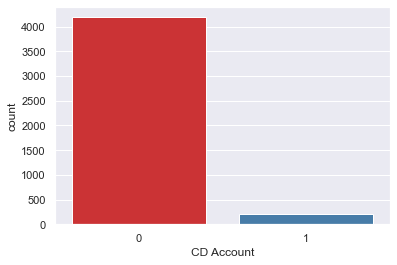


*********************************** EDA for SVM ***********************************


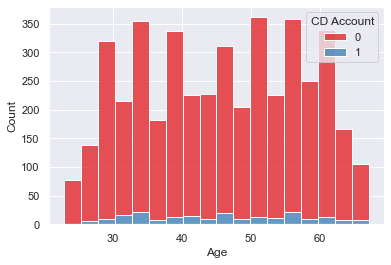

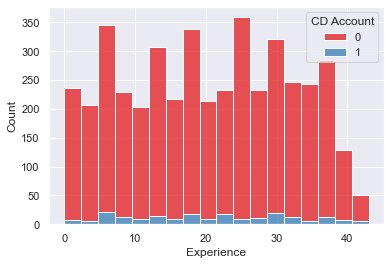

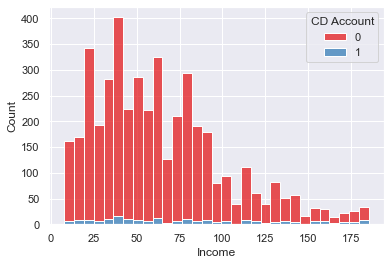

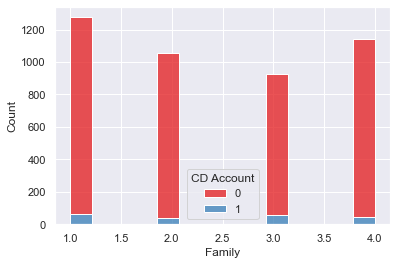

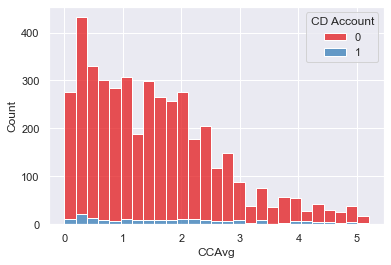

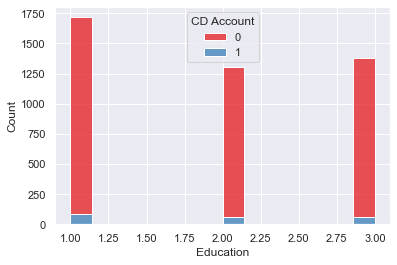

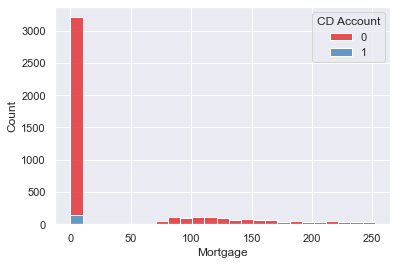

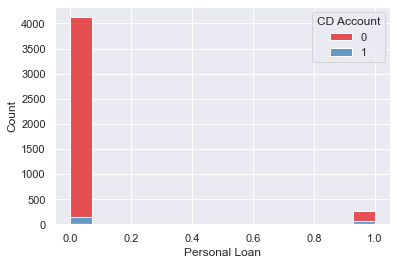

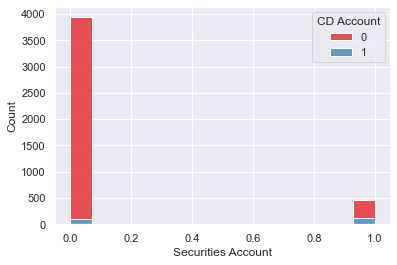

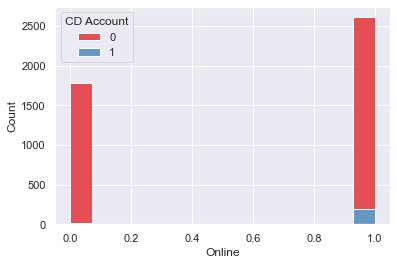

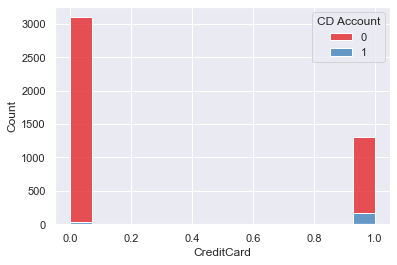

In [62]:
#Check if we have unbalance data
print('\n'+('*'*35)+'Counter of Target '+('*'*35))
print('Original dataset shape %s' % Counter(Target_SVM))
print('*'*100)
sns.countplot(x=Target_SVM, palette = 'Set1')
plt.show()
print('\n'+('*'*35)+' EDA for SVM '+('*'*35))
#EDA for SVM
for plot in Features_SVM_name:
  sns.histplot(svm_data, x=plot, hue='CD Account', multiple='stack', palette = 'Set1')
  plt.show()

In [63]:
#Apply Simple SVM without one hot encoding/ optimal Features/ cross validation
from sklearn.model_selection import train_test_split
XtrainSVM, XtestSVM, ytrainSVM, ytestSVM = train_test_split(Features_SVM, Target_SVM, test_size = 0.3)#Training 70% , Testing 30%


*********************************** The Shape of Features and Target after Train, test, split ******************************
Xtrain Shape:(3078, 11)  Xtest Shape:(1320, 11)
ytrain Shape:(3078,)  ytest Shape:(1320,)

**************************************** SVC ****************************************
SVC()

*********************************** Predictes Values ***********************************
[0 0 0 ... 0 0 0]

*********************************** DataFrame *********************************************
      Actual  Predicted
4249       0          0
2801       0          0
1140       0          0
1958       0          0
2095       0          0
...      ...        ...
1989       0          0
2542       0          0
91         0          0
932        1          0
2730       0          0

[1320 rows x 2 columns]

*********************************** Accuracy **************************************************
Accuracy: 0.9553030303030303

*********************************** Confusion Matr

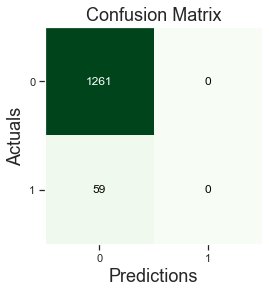


****************************** Recall, Precision and F1-scpre of Simple Decision SVM ******************************
Precision score: 0.0
Recall score: 0.0
F1 Score: 0.0

*********************************** Classification Report ****************************************
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98      1261
     Class 1       0.00      0.00      0.00        59

    accuracy                           0.96      1320
   macro avg       0.48      0.50      0.49      1320
weighted avg       0.91      0.96      0.93      1320



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-

In [64]:
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print('\n'+('*'*35)+' The Shape of Features and Target after Train, test, split '+('*'*30))
print('Xtrain Shape:%s' %str(XtrainSVM.shape) +'  Xtest Shape:%s' %str(XtestSVM.shape))
print('ytrain Shape:%s' %str(ytrainSVM.shape) +'  ytest Shape:%s' %str(ytestSVM.shape))
print('\n'+('*'*40)+' SVC '+('*'*40))
Simple_SVM = SVC()
print(Simple_SVM)
Simple_SVM.fit(XtrainSVM, ytrainSVM)

#Predictions
SVM_Target_pred = Simple_SVM.predict(XtestSVM)
print('\n' + ('*'*35)+ ' Predictes Values '+('*'*35))
print(SVM_Target_pred)
print('\n' + ('*'*35)+ ' DataFrame '+('*'*45))
Predictions=pd.DataFrame({'Actual':ytestSVM, 'Predicted':SVM_Target_pred})
print(Predictions)

#Accuracy 
print('\n' + ('*'*35)+ ' Accuracy '+('*'*50))
print("Accuracy:",metrics.accuracy_score(ytestSVM, SVM_Target_pred))

#Confusion Matrix
print('\n' + ('*'*35)+ ' Confusion Matrix '+('*'*43))
SVM_cm= confusion_matrix(ytestSVM, SVM_Target_pred)
print(SVM_cm)
fig, ax = plot_confusion_matrix(conf_mat=SVM_cm, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('\n' + ('*'*30)+ ' Recall, Precision and F1-scpre of Simple Decision SVM '+('*'*30))
print("Precision score: {}".format(precision_score(ytestSVM, SVM_Target_pred)))
print("Recall score: {}".format(recall_score(ytestSVM, SVM_Target_pred)))
print("F1 Score: {}".format(f1_score(ytestSVM, SVM_Target_pred)))


print('\n' + ('*'*35)+ ' Classification Report '+('*'*40))
target_names = ['Class 0', 'Class 1']
print(classification_report(ytestSVM, SVM_Target_pred, target_names=target_names))


Education            -0.006481
Family               -0.000820
Age                   0.005973
Experience            0.008229
Mortgage              0.009639
CCAvg                 0.082784
Income                0.114803
Online                0.157538
Personal Loan         0.245397
CreditCard            0.258376
Securities Account    0.320952
dtype: float64


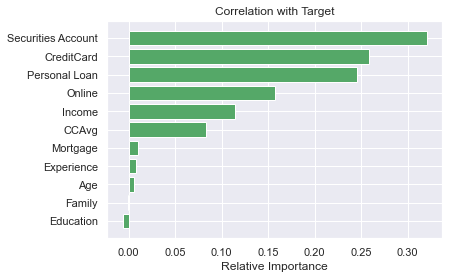

In [65]:
#Identify input features having high correlation with target variable
import numpy as np
importances_SVM = Features_SVM.apply(lambda x: x.corr(Target_SVM))
indices_SVM = np.argsort(importances_SVM)
print(importances_SVM[indices_SVM])

#Plot the results
plt.title('Correlation with Target')
plt.barh(range(len(indices_SVM)), importances_SVM[indices_SVM], color='g', align='center')
plt.yticks(range(len(indices_SVM)), [Features_SVM_name[i] for i in indices_SVM])
plt.xlabel('Relative Importance')
plt.show()


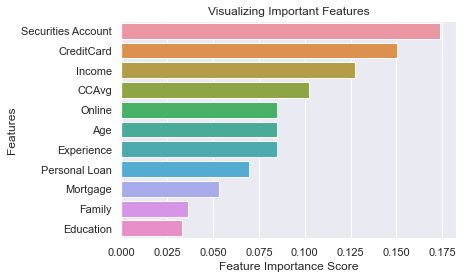

Securities Account    0.173954
CreditCard            0.150120
Income                0.127182
CCAvg                 0.102190
Online                0.085086
Age                   0.084812
Experience            0.084665
Personal Loan         0.069626
Mortgage              0.052957
Family                0.036165
Education             0.033243
dtype: float64


In [66]:
#Feature Selection via Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_SVM = RandomForestClassifier().fit(XtrainSVM, ytrainSVM) 
fearure_importance_svm = pd.Series(forest_SVM.feature_importances_, index=Features_SVM_name).sort_values(ascending=False)

#Bar plot for feature importance
sns.barplot(x=fearure_importance_svm, y=fearure_importance_svm.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
print(fearure_importance_svm)

In [67]:
'''
In both cases we see that 'Family' and 'Education' have a low importance on the target, thus are going to be removed.
Since 'Family' and 'Education' are the only categorical columns in the dataset and we drop there is no need for one hot encoding, since one hot encoding is handling categorical data 
'''
#Remove 'Family' and 'Education'
Features_SVM.drop(['Family', 'Education'],axis=1,inplace=True)
print('\n'+('*'*35)+' The new Features '+('*'*35))
print(Features_SVM.head())
print('\n'+('*'*35)+' The new Features Shape '+('*'*35))
print(Features_SVM.shape)
print('\n'+('*'*35)+' The new Features description '+('*'*35))
print(Features_SVM.describe())


*********************************** The new Features ***********************************
   Age  Experience  Income  CCAvg  Mortgage  Personal Loan  \
0   25           1      49    1.6         0              0   
1   45          19      34    1.5         0              0   
2   39          15      11    1.0         0              0   
3   35           9     100    2.7         0              0   
4   35           8      45    1.0         0              0   

   Securities Account  Online  CreditCard  
0                   1       0           0  
1                   1       0           0  
2                   0       0           0  
3                   0       0           0  
4                   0       0           1  

*********************************** The new Features Shape ***********************************
(4398, 9)

*********************************** The new Features description ***********************************
               Age   Experience       Income        CCAvg     Mor

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
#Find the optimal hyperparaeters via gridSearch with 10 fold cross validation
from sklearn.model_selection import GridSearchCV

kernels_param ={'kernel': ['linear', 'rbf'],
                'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01]}
Hyper_SVM = SVC()
hyperparameters  = GridSearchCV(Hyper_SVM, param_grid= kernels_param,
                   cv = 10, #10-fold cross validation
                   verbose= 3, scoring = 'accuracy')               
hyperparameters.fit(Features_SVM, Target_SVM)
print('\n'+('*'*25)+' The Best Hyperparameters via GridSearch and 10 fold CV'+('*'*25))
print("The best hyperparameters are: ", hyperparameters.best_params_)
print("The best score is: ", hyperparameters.best_score_)
print("The best estimator is: ", hyperparameters.best_estimator_)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END .................C=0.1, gamma=1, kernel=linear; total time=  59.4s
[CV 2/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.0min
[CV 3/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.0min
[CV 4/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.2min
[CV 5/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV 6/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.2min
[CV 7/10] END .................C=0.1, gamma=1, kernel=linear; total time=  55.3s
[CV 8/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.1min
[CV 9/10] END .................C=0.1, gamma=1, kernel=linear; total time= 1.3min
[CV 10/10] END ................C=0.1, gamma=1, kernel=linear; total time=  57.8s
[CV 1/10] END ....................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV 2/10] END ....................C=0.1, gamma

[CV 2/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.3min
[CV 3/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.2min
[CV 4/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.6min
[CV 5/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.6min
[CV 6/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.5min
[CV 7/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.1min
[CV 8/10] END ................C=1, gamma=0.01, kernel=linear; total time= 2.0min
[CV 9/10] END ................C=1, gamma=0.01, kernel=linear; total time= 1.5min
[CV 10/10] END ...............C=1, gamma=0.01, kernel=linear; total time= 1.3min
[CV 1/10] END ...................C=1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 2/10] END ...................C=1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 3/10] END ...................C=1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 4/10] END ..............

The Support Vector Macine's accuracy with 10-fold cross calidation:  0.9818114516463037

*********************************** The accuracy for each fold *********************************************
For the 0 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9795454545454545
For the 1 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9772727272727273
For the 2 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9886363636363636
For the 3 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9863636363636363
For the 4 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9772727272727273
For the 5 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9795454545454545
For the 6 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9772727272727273
For the 7 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.9818181818181818
For the 8 fold of the SVM 

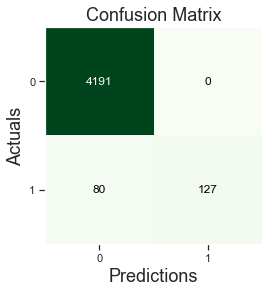


******************************************************************************************************************************************************

************************************************** Recall **************************************************
The Recall score for the 10 fold is:  0.55
The Recall score for the 10 fold is:  0.5238095238095238
The Recall score for the 10 fold is:  0.7619047619047619
The Recall score for the 10 fold is:  0.7142857142857143
The Recall score for the 10 fold is:  0.5238095238095238
The Recall score for the 10 fold is:  0.5714285714285714
The Recall score for the 10 fold is:  0.5238095238095238
The Recall score for the 10 fold is:  0.6190476190476191
The Recall score for the 10 fold is:  0.65
The Recall score for the 10 fold is:  0.7
Recall mean 0.6138095238095238

**************************************************************************************************************

************************************************** Precision ******

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Aplly 10 fold cross validation with out the optimal hyperparameters
SVM_cros = hyperparameters.best_estimator_

#Apply The best estimator, 10-fold Cross validation to find the optimal DT with out SMOTE method
scores_SVM = cross_val_score(SVM_cros, Features_SVM, Target_SVM, cv=10, scoring = 'accuracy')
print("The Support Vector Macine's accuracy with 10-fold cross calidation: ", scores_SVM.mean())
print("\n" +('*'*35)+' The accuracy for each fold ' +("*" * 45))
for i in range(0, len(scores_SVM)):
    print("For the", str(i) + " fold of the SVM using 10 - kfold cross validation the accuracy is: ", scores_SVM[i])
print("\n" + ("*" * 150))

#confusion matrix 
print("\n" + ("*" * 40)+ 'Confusion matrix with the optimal hyperparameters and 10 fold cross validation'+("*" * 25))

y_pred_optimal_SVM = cross_val_predict(SVM_cros, Features_SVM, Target_SVM, cv=10)
conf_mat_SVM = confusion_matrix(Target_SVM, y_pred_optimal_SVM)
print(conf_mat_SVM)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SVM, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print("\n" + ("*" * 150))
# Recall for each fold
print('\n'+('*'*50) + ' Recall '+ ('*'*50))
recall_score_SVM = cross_val_score(SVM_cros, Features_SVM, Target_SVM, cv=10 ,scoring='recall')
for recall in recall_score_SVM: 
  print('The Recall score for the 10 fold is: ', recall)
print('Recall mean', np.mean(recall_score_SVM))
print('\n'+ ('*'*110))

#Precision for each fold
print('\n'+('*'*50) + ' Precision '+ ('*'*50))
precision_score_SVM = cross_val_score(SVM_cros, Features_SVM, Target_SVM, cv=10 , scoring='precision')
for precision in precision_score_SVM: 
  print('The Precision score for the 10 fold is: ', precision)
print('precision mean', np.mean(precision_score_SVM))
print('\n'+ ('*'*110))

#F1-score for each fold
print('\n'+('*'*50) + ' F1-score '+ ('*'*50))
f1_score_SVM = cross_val_score(SVM_cros, Features_SVM, Target_SVM, cv=10, scoring='f1')
for f1 in f1_score_SVM: 
  print('The Precision score for the 10 fold is: ', f1)
print('f1 mean', np.mean(f1_score_SVM))
print('\n'+ ('*'*110))

print('\n'+('*'*50) + ' Dataframe for SVM '+ ('*'*50))
dt_SVM = pd.DataFrame({'Accuracy': scores_SVM,  'Recall': recall_score_SVM, 
                                'Precision':precision_score_SVM, 'F1-score':f1_score_SVM})
print(dt_SVM)
#Classification Report for optimized SVM
print('\n'+('*'*50) + 'Classification Report (Optimized) '+ ('*'*50))
target_names = ['Class 0', 'Class 1']
print(classification_report(Target_SVM, cross_val_predict(SVM_cros, Features_SVM, Target_SVM, cv=10), target_names=target_names))


In [70]:
'''
Use 3 Ways to balance the dataset and compare them:
1)Random Under Sampling
2)Random Over Sampling
3)SMOTE Method
'''

'\nUse 3 Ways to balance the dataset and compare them:\n1)Random Under Sampling\n2)Random Over Sampling\n3)SMOTE Method\n'

In [71]:
#Create a function for the information of using Over and Under Sampling 

def fix_dataset(method):
  #Method to fix the dataset
  x_new, y_new = method.fit_resample(Features_SVM, Target_SVM)

  #The dataset shape
  print('\n' + ("*"*25) + " The Shape of the Target before and after "+ ("*"*25))
  print('Original dataset shape', Counter(Target_SVM))
  print('Resample dataset shape', Counter(y_new))

  # Visuakize The Target shape
  print('\n' + ("*"*25) + " The Target  "+ ("*"*25))
  sns.countplot(x=y_new, palette = 'Set1')
  plt.show()
  print('\n' + ("*"*25) + " 10-Folds Cross Validaiation  "+ ("*"*25))

  #Aplly 10 fold cross validation with out the optimal hyperparameters
  SVM_new = SVC()

  #Apply The best estimator, 10-fold Cross validation to find the optimal DT with out SMOTE method
  scores_SVM_new = cross_val_score(SVM_new, x_new, y_new, cv=10, scoring = 'accuracy')
  print("The Support Vector Macine's accuracy with 10-fold cross calidation: ", scores_SVM_new.mean())
  print("\n" +('*'*35)+' The accuracy for each fold ' +("*" * 45))
  for i in range(0, len(scores_SVM_new)):
      print("For the", str(i) + " fold of the SVM using 10 - kfold cross validation the accuracy is: ", scores_SVM_new[i])

  #confusion matrix 
  print("\n" + ("*" * 40)+ 'Confusion matrix with the optimal hyperparameters and 10 fold cross validation'+("*" * 25))
  y_pred_optimal_SVM_new = cross_val_predict(SVM_new, x_new, y_new, cv=10)
  conf_mat_SVM_new = confusion_matrix(y_new, y_pred_optimal_SVM_new)
  print(conf_mat_SVM_new)
  fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SVM_new, cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

  # Recall for each fold
  print('\n'+('*'*50) + ' Recall '+ ('*'*50))
  recall_score_SVM_new = cross_val_score(SVM_new, x_new, y_new, cv=10 ,scoring='recall')
  for recall in recall_score_SVM_new: 
    print('The Recall score for the 10 fold is: ', recall)
  print('Recall mean', np.mean(recall_score_SVM_new))

  #Precision for each fold
  print('\n'+('*'*50) + ' Precision '+ ('*'*50))
  precision_score_SVM_new = cross_val_score(SVM_new, x_new, y_new, cv=10 , scoring='precision')
  for precision in precision_score_SVM_new: 
    print('The Precision score for the 10 fold is: ', precision)
  print('precision mean', np.mean(precision_score_SVM_new))

  #F1-score for each fold
  print('\n'+('*'*50) + ' F1-score '+ ('*'*50))
  f1_score_SVM_new = cross_val_score(SVM_new, x_new, y_new, cv=10, scoring='f1')
  for f1 in f1_score_SVM_new: 
    print('The Precision score for the 10 fold is: ', f1)
  print('f1 mean', np.mean(f1_score_SVM_new))

  print('\n'+('*'*50) + ' Dataframe for SVM '+ ('*'*50))
  dt_SVM = pd.DataFrame({'Accuracy': scores_SVM_new,  'Recall': recall_score_SVM_new, 
                                'Precision':precision_score_SVM_new, 'F1-score':f1_score_SVM_new})

    #Classification Report for optimized SVM
  print('\n'+('*'*50) + 'Classification Report (Optimized) '+ ('*'*50))
  target_names = ['Class 0', 'Class 1']
  print(classification_report(y_new, cross_val_predict(SVM_new, x_new, y_new, cv=10), target_names=target_names))



************************************************** Random Over Sampling **************************************************

************************* The Shape of the Target before and after *************************
Original dataset shape Counter({0: 4191, 1: 207})
Resample dataset shape Counter({0: 4191, 1: 4191})

************************* The Target  *************************


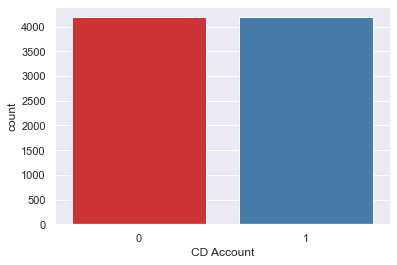


************************* 10-Folds Cross Validaiation  *************************
The Support Vector Macine's accuracy with 10-fold cross calidation:  0.6258652618044552

*********************************** The accuracy for each fold *********************************************
For the 0 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.635280095351609
For the 1 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6138259833134684
For the 2 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6312649164677804
For the 3 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6455847255369929
For the 4 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6431980906921241
For the 5 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6205250596658711
For the 6 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6026252983293556
For the 7 fold of the SVM using 10 - kfold

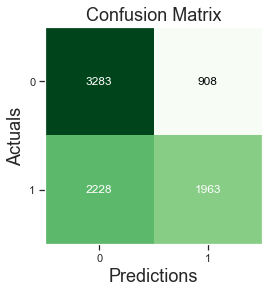


************************************************** Recall **************************************************
The Recall score for the 10 fold is:  0.45346062052505964
The Recall score for the 10 fold is:  0.4452380952380952
The Recall score for the 10 fold is:  0.4988066825775656
The Recall score for the 10 fold is:  0.5107398568019093
The Recall score for the 10 fold is:  0.5011933174224343
The Recall score for the 10 fold is:  0.5035799522673031
The Recall score for the 10 fold is:  0.441527446300716
The Recall score for the 10 fold is:  0.44630071599045346
The Recall score for the 10 fold is:  0.431980906921241
The Recall score for the 10 fold is:  0.4510739856801909
Recall mean 0.4683901579724969

************************************************** Precision **************************************************
The Precision score for the 10 fold is:  0.7116104868913857
The Precision score for the 10 fold is:  0.6726618705035972
The Precision score for the 10 fold is:  0.6785714285714

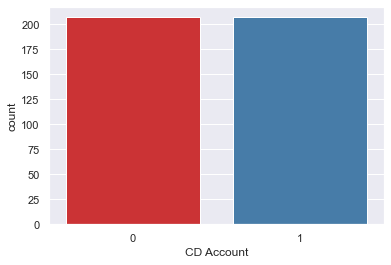


************************* 10-Folds Cross Validaiation  *************************
The Support Vector Macine's accuracy with 10-fold cross calidation:  0.6013937282229964

*********************************** The accuracy for each fold *********************************************
For the 0 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6428571428571429
For the 1 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.5476190476190477
For the 2 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6666666666666666
For the 3 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.5714285714285714
For the 4 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6341463414634146
For the 5 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6829268292682927
For the 6 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.7317073170731707
For the 7 fold of the SVM using 10 - kfol

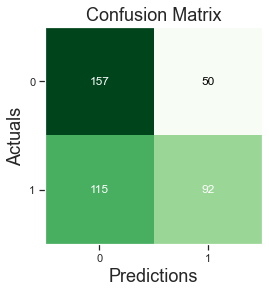


************************************************** Recall **************************************************
The Recall score for the 10 fold is:  0.42857142857142855
The Recall score for the 10 fold is:  0.38095238095238093
The Recall score for the 10 fold is:  0.6190476190476191
The Recall score for the 10 fold is:  0.42857142857142855
The Recall score for the 10 fold is:  0.5
The Recall score for the 10 fold is:  0.6
The Recall score for the 10 fold is:  0.5
The Recall score for the 10 fold is:  0.2857142857142857
The Recall score for the 10 fold is:  0.38095238095238093
The Recall score for the 10 fold is:  0.3333333333333333
Recall mean 0.4457142857142856

************************************************** Precision **************************************************
The Precision score for the 10 fold is:  0.75
The Precision score for the 10 fold is:  0.5714285714285714
The Precision score for the 10 fold is:  0.6842105263157895
The Precision score for the 10 fold is:  0.6
The Pr

In [72]:
#Random Under and Over Sampling with 10 fold cross validation and use of a SIMPLE model  
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
print('\n'+('*'*50) + ' Random Over Sampling '+ ('*'*50))
fix_dataset(ros)
print('\n'+('*'*50) + ' Random Under Sampling '+ ('*'*49))
fix_dataset(rus)

SMOTE Target shape Counter({0: 4191, 1: 4191})

************************* The Target with SMOTE Method *************************


<AxesSubplot:xlabel='CD Account', ylabel='count'>

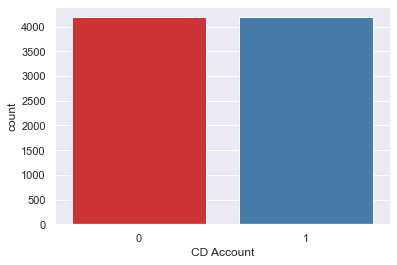

In [73]:
#SMOTE Method for svm 
from imblearn.over_sampling import SMOTE
SMOTE_svm = SMOTE()

#note: the features are the optimal (without 'Family', 'Education' )
Features_smote_svm, Target_smote_svm = SMOTE_svm.fit_resample(Features_SVM, Target_SVM) #SMOTE features ad target
print('SMOTE Target shape %s' % Counter(Target_smote_svm))
print('\n' + ("*"*25) + " The Target with SMOTE Method "+ ("*"*25))
sns.countplot(x=Target_smote_svm, palette = 'Set1')

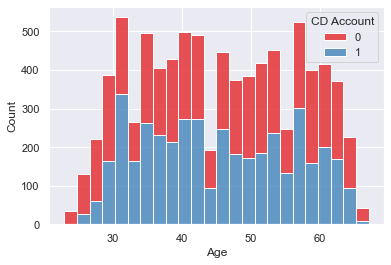

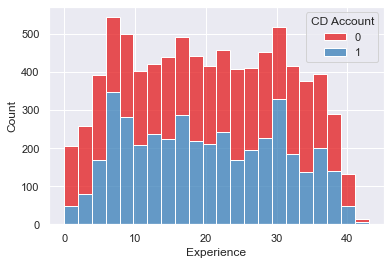

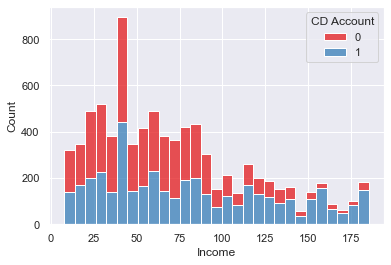

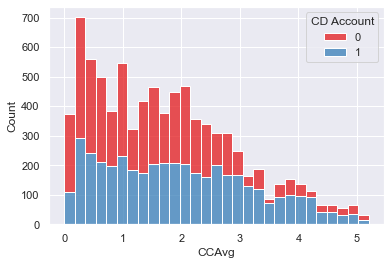

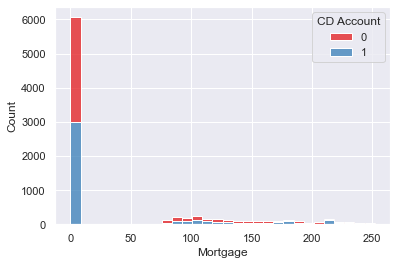

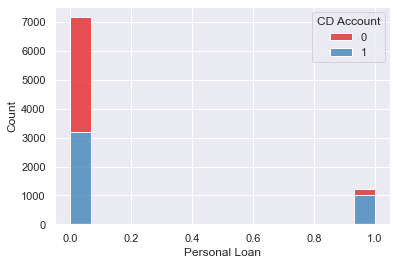

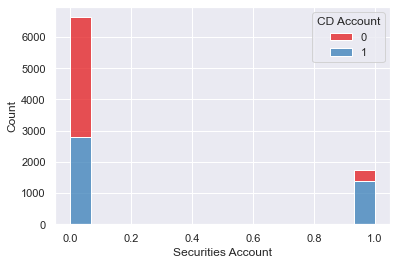

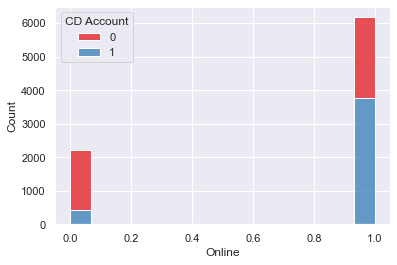

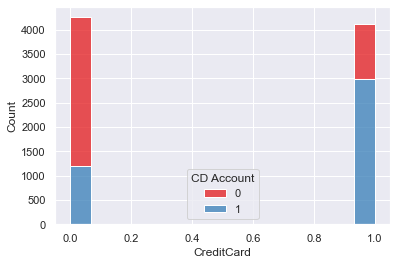

In [74]:
#EDA for smote method 

#Merge the dataframes
result = pd.concat([Features_smote_svm, Target_smote_svm], axis=1, join='inner')

#plot the relationship between the features based on the new (SMOTE) dataset
for plot in Features_smote_svm.columns:
  sns.histplot(result, x=plot, hue='CD Account', multiple='stack', palette = 'Set1')
  plt.show()  


************************* The best estimator *************************
SVC()
The Support Vector Macine's accuracy with 10-fold cross calidation and SMOTE Method:  0.621807555875417

*********************************** The accuracy for each fold *********************************************
For the 0 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6543504171632897
For the 1 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.5983313468414779
For the 2 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6109785202863962
For the 3 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6264916467780429
For the 4 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.5835322195704057
For the 5 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.5775656324582339
For the 6 fold of the SVM using 10 - kfold cross validation the accuracy is:  0.6384248210023866
For the 7 fold of the SVM usi

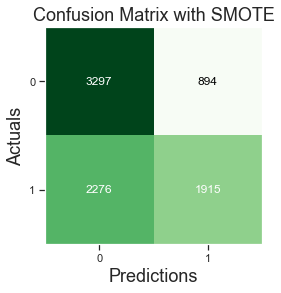


******************************************************************************************************************************************************

************************************************** Recall with SMOTE Method **************************************************
The Recall score for the 10 fold is:  0.48448687350835323
The Recall score for the 10 fold is:  0.42857142857142855
The Recall score for the 10 fold is:  0.45346062052505964
The Recall score for the 10 fold is:  0.4701670644391408
The Recall score for the 10 fold is:  0.38663484486873506
The Recall score for the 10 fold is:  0.4105011933174224
The Recall score for the 10 fold is:  0.4916467780429594
The Recall score for the 10 fold is:  0.48687350835322196
The Recall score for the 10 fold is:  0.4916467780429594
The Recall score for the 10 fold is:  0.46539379474940334
Recall mean 0.45693828844186835

**************************************************************************************************************


In [75]:
#Apply 10 fold CV with SMote method with a smiple model 

#The best Estimator
print('\n' + ('*'*25)+ ' The best estimator ' +('*'*25))
SVM_SMOTE = SVC()
print(SVM_SMOTE)

#Accuracy for each flod
scores_SMOTE_SVM = cross_val_score(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10, scoring = 'accuracy')
print("The Support Vector Macine's accuracy with 10-fold cross calidation and SMOTE Method: ", scores_SMOTE_SVM.mean())
print("\n" +('*'*35)+' The accuracy for each fold ' +("*" * 45))
for i in range(0, len(scores_SMOTE_SVM)):
    print("For the", str(i) + " fold of the SVM using 10 - kfold cross validation the accuracy is: ", scores_SMOTE_SVM[i])

#confusion matrix with SMOTE method
print("\n" + ("*" * 35)+ ' Confusion matrix with SMOTE Method '+("*"*35))
y_pred_optimal_SVM_SMOTE = cross_val_predict(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10)
conf_mat_SVM_SMOTE = confusion_matrix(Target_smote_svm, y_pred_optimal_SVM_SMOTE)
print(conf_mat_SVM_SMOTE)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_SVM_SMOTE, cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix with SMOTE', fontsize=18)
plt.show()


print("\n" + ("*" * 150))
# Recall for each fold with smote
print('\n'+('*'*50) + ' Recall with SMOTE Method '+ ('*'*50))
recall_score_SVM_SMOTE = cross_val_score(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10 ,scoring='recall')
for recall_smote in recall_score_SVM_SMOTE: 
  print('The Recall score for the 10 fold is: ', recall_smote)
print('Recall mean', np.mean(recall_score_SVM_SMOTE))
print('\n'+ ('*'*110))

#Precision for each fold with smote method
print('\n'+('*'*50) + ' Precision with SMOTE Method '+ ('*'*50))
precision_score_SVM_SMOTE = cross_val_score(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10 , scoring='precision')
for precision_smote in precision_score_SVM_SMOTE: 
  print('The Precision score for the 10 fold is: ', precision_smote)
print('precision mean', np.mean(precision_score_SVM_SMOTE))
print('\n'+ ('*'*110))

#F1-score for each fold with smote method
print('\n'+('*'*50) + ' F1-score with SMOTE Method '+ ('*'*50))
f1_score_SVM_SMOTE = cross_val_score(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10, scoring='f1')
for f1_smote in f1_score_SVM_SMOTE: 
  print('The F1 Score score for the 10 fold is: ', f1_smote)
print('f1 mean', np.mean(f1_score_SVM_SMOTE))

#dataFrame
print('\n'+('*'*25)+'Dataframe of Recall, Precision, F1-score with SMOTE Method'+('*'*25))
SVM_SMOTE_dataframe = pd.DataFrame({'Accuracy SMOTE': scores_SMOTE_SVM, 'Recall SMOTE': recall_score_SVM_SMOTE, 
                                    'Precision SMOTE': precision_score_SVM_SMOTE, 'F1-Score SMOTE':f1_score_SVM_SMOTE})
print(SVM_SMOTE_dataframe)

#Classification Report for optimized SVM
print('\n'+('*'*50) + 'Classification Report (Optimized) '+ ('*'*50))
target_names = ['Class 0', 'Class 1']
print(classification_report(Target_smote_svm, cross_val_predict(SVM_SMOTE, Features_smote_svm, Target_smote_svm, cv=10), target_names=target_names))

In [76]:
#Enseble learning for the Third senario

from sklearn.metrics import average_precision_score, precision_recall_curve

#Defining function for Precision Recall Curve
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

Average precision-recall score: 0.862


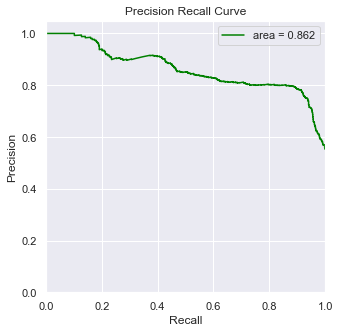

Average precision-recall score: 0.691


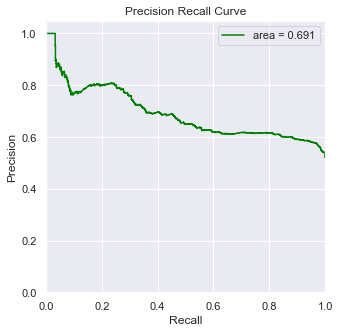

Average precision-recall score: 0.861


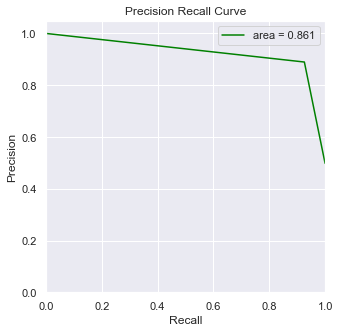

Average precision-recall score: 0.984


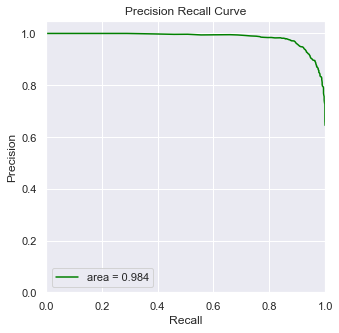

Average precision-recall score: 0.918


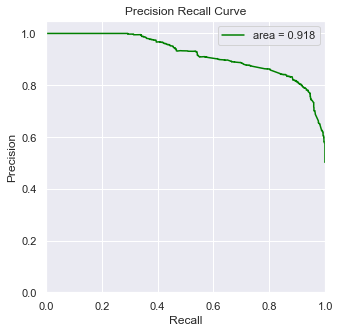

In [77]:
plt.rcParams["figure.figsize"] = (5,5)

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble  import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

ensemble_X_train, ensemble_X_test, ensemble_y_train, ensemble_y_test = train_test_split(Features_smote_svm, Target_smote_svm, test_size=0.30)
# Making a list of all classifiers
classifier_model =  [GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(ensemble_X_train,ensemble_y_train)
    
    # Predicting the output on test dataset
    y_pred_test = classifier.predict(ensemble_X_test)    
    score_test = accuracy_score(ensemble_y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(ensemble_X_train) 
    score_train = accuracy_score(ensemble_y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, ensemble_X_train,ensemble_y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(ensemble_y_test, y_pred_test))
    precisionscore.append(precision_score(ensemble_y_test, y_pred_test))
    recallscore.append(recall_score(ensemble_y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(ensemble_X_test)
    except:
        y_pred_score = classifier.predict_proba(ensemble_X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(ensemble_y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    
    #precision-recall curve

    plot_prec_rec_curve(classifier_list.__class__.__name__, ensemble_y_test, y_pred_score)

In [78]:
############################################################################# End of second Senario ###########################################################################